In [1]:
# Importing GemPy
import gempy as gp
from gempy.assets.geophysics import GravityPreprocessing

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import spatial
import pandas as pd
from matplotlib import colors
import copy
import math as math
from sklearn.neighbors import KernelDensity
import scipy.stats as stats
from sklearn. preprocessing import scale
from sklearn.decomposition import PCA
from scipy.ndimage.filters import gaussian_filter
from mpl_toolkits.mplot3d import Axes3D
from pyvista import set_plot_theme
set_plot_theme('document')

In [2]:
import theano.tensor as T
import theano

In [3]:
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances_argmin_min

In [4]:
import sys, os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# create a greenstone model

In [5]:
geo_model_true = gp.load_model('Greenstone', path = 'Data')
geo_model_true.surfaces

Active grids: ['regular']


surface               series  order_surfaces    color  id  value_0
3  EarlyGranite  EarlyGranite_Series               1  #728f02   1     2.61
0  SimpleMafic2           BIF_Series               1  #015482   2     2.92
1     SimpleBIF           BIF_Series               2  #9f0052   3     3.10
2  SimpleMafic1   SimpleMafic_Series               1  #ffbe00   4     2.92
4      basement             Basement               1  #443988   5     2.61

/Users/liangyang/Documents/Stanford/ThesisMcMC/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


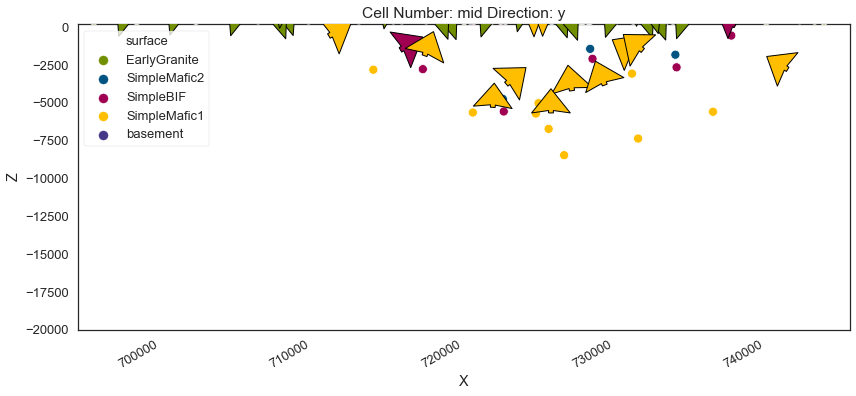

In [6]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
gp.plot_2d(geo_model_true)

In [7]:
geo_model_true.grid.values.shape

(125000, 3)

In [8]:
grav_res = 20
X = np.linspace(7.050000e+05, 747000, grav_res)
Y = np.linspace(6863000, 6925000, grav_res)
Z = 300
xyz = np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T
xy_ravel

array([[7.05000000e+05, 6.86300000e+06, 3.00000000e+02],
       [7.07210526e+05, 6.86300000e+06, 3.00000000e+02],
       [7.09421053e+05, 6.86300000e+06, 3.00000000e+02],
       ...,
       [7.42578947e+05, 6.92500000e+06, 3.00000000e+02],
       [7.44789474e+05, 6.92500000e+06, 3.00000000e+02],
       [7.47000000e+05, 6.92500000e+06, 3.00000000e+02]])

In [1]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
gp.plot_2d(geo_model_true, direction='z', show=False)
plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.show()

NameError: name 'plt' is not defined

In [10]:
geo_model_true.set_centered_grid(xy_ravel, resolution=[10, 10, 15], radius=5000)
geo_model_true.grid.centered_grid.kernel_centers

Active grids: ['regular' 'centered']


array([[-5000.        , -5000.        ,  -300.        ],
       [-5000.        , -5000.        ,  -360.        ],
       [-5000.        , -5000.        ,  -383.36972966],
       ...,
       [ 5000.        ,  5000.        , -3407.68480754],
       [ 5000.        ,  5000.        , -4618.11403801],
       [ 5000.        ,  5000.        , -6300.        ]])

In [11]:
g = GravityPreprocessing(geo_model_true.grid.centered_grid)

In [12]:
tz = g.set_tz_kernel()

In [13]:
gp.set_interpolator(geo_model_true, output=['gravity'], pos_density=1, gradient=False,
                    theano_optimizer='fast_run')

Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
nugget grad              0.01
nugget scalar           1e-06


In [14]:
sol = gp.compute_model(geo_model_true)
grav_true = sol.fw_gravity

/Users/liangyang/Documents/Stanford/ThesisMcMC/gempy/core/solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
/Users/liangyang/Documents/Stanford/ThesisMcMC/gempy/core/solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))
/Users/liangyang/Documents/Stanford/ThesisMcMC/gempy/core/solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:2
  '; Surface Number:' + str(s_n))
/Users/liangyang/Documents/Stanford/ThesisMcMC/gempy/core/sol

In [15]:
sol.scalar_field_matrix.shape

(3, 125000)

In [16]:
sol.scalar_field_at_surface_points

array([[0.05677454, 0.        , 0.        , 0.        ],
       [0.        , 0.71998505, 0.71403933, 0.        ],
       [0.        , 0.        , 0.        , 0.55517814]])

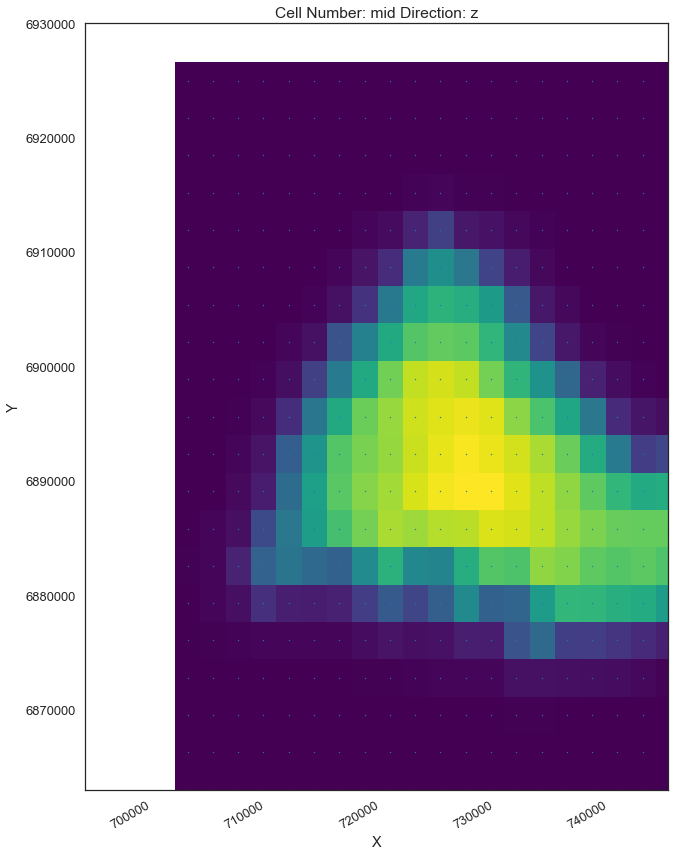

In [17]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
gp.plot_2d(geo_model_true, direction=['z'], height=7, show_results=False, show_data=False,
           show=False)
plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.imshow(sol.fw_gravity.reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower')
plt.show()

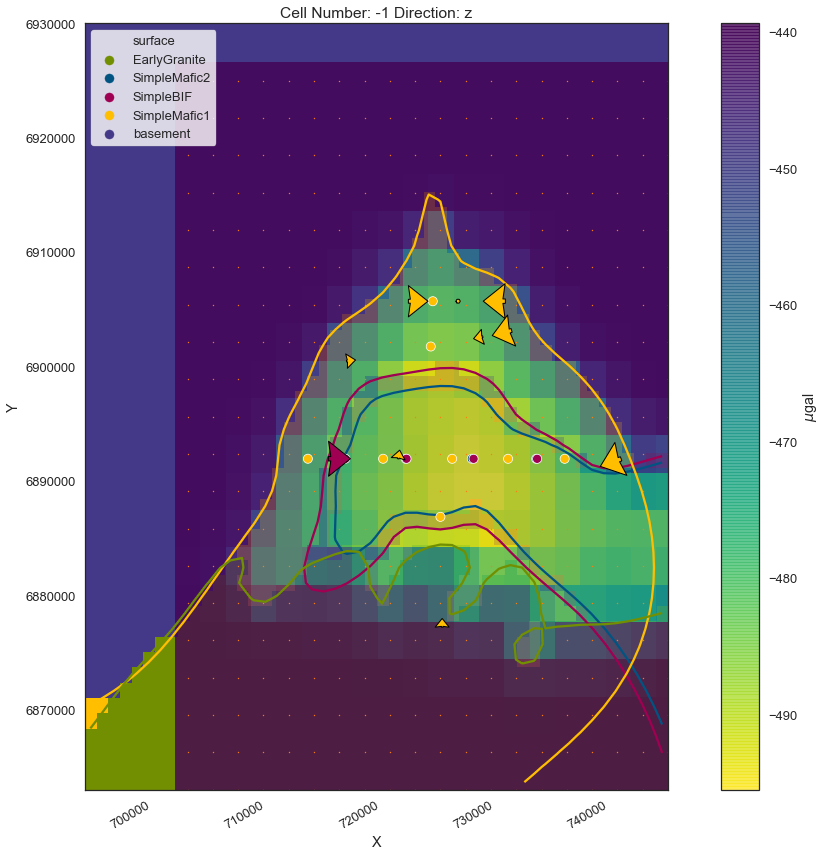

In [18]:
gp.plot_2d(geo_model_true, cell_number=[-1], direction=['z'], show=False,
           kwargs_regular_grid={'alpha': .5})

plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.imshow(grav_true.reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
cbar.set_label(r'$\mu$gal')
plt.show()

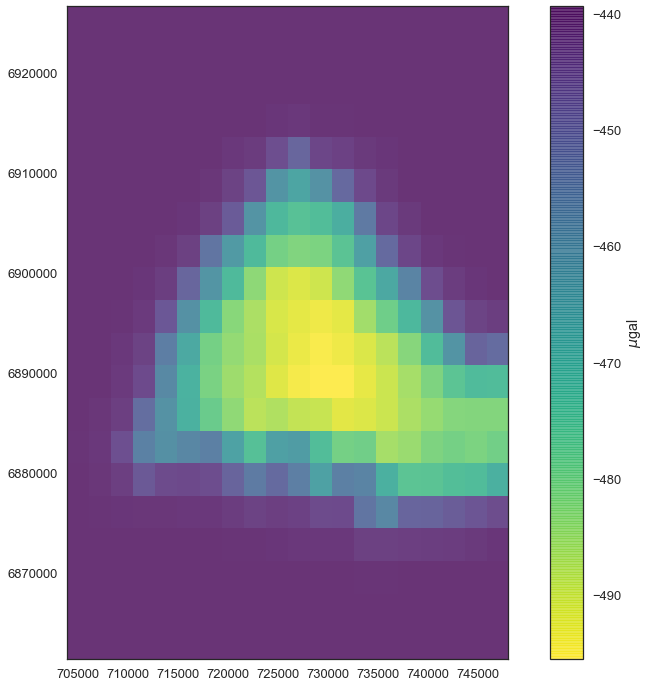

In [19]:
plt.imshow(grav_true.reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
cbar.set_label(r'$\mu$gal')
plt.show()

/Users/liangyang/Documents/Stanford/ThesisMcMC/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


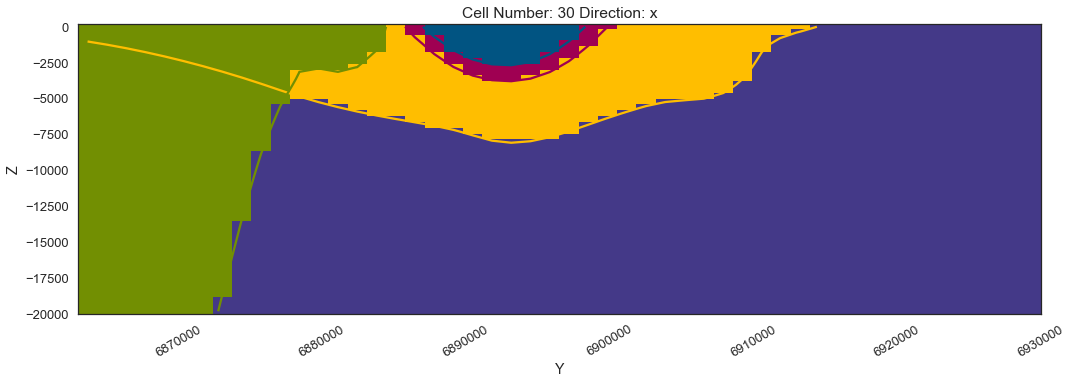

In [20]:
gp.plot_2d(geo_model_true, cell_number=30, direction='x', show_data = False)

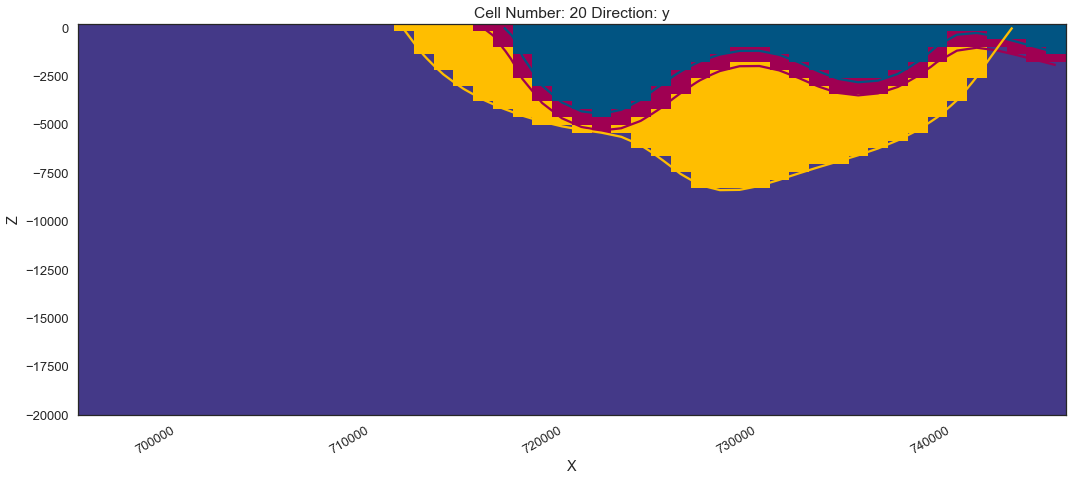

In [21]:
gp.plot_2d(geo_model_true, cell_number=20, direction='y', show_data = False)

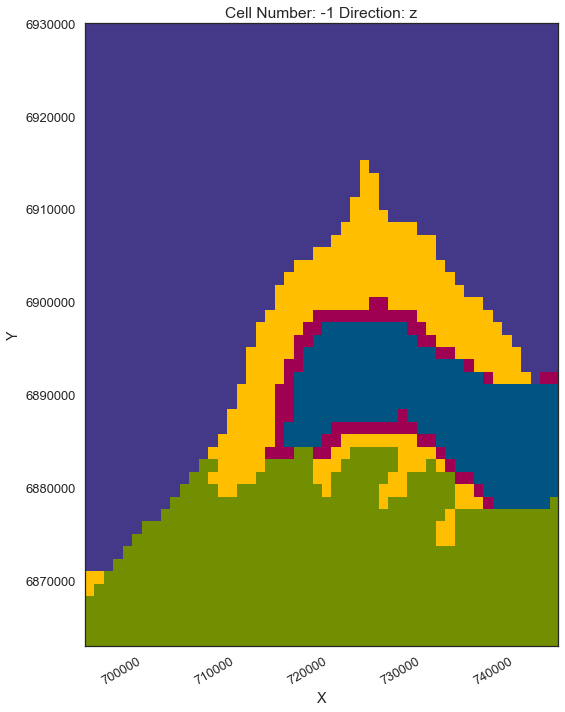

In [189]:
gp.plot_2d(geo_model_true, cell_number=-1, direction='z', show_data = False, show_boundaries = False)
#plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
#plt.show()

In [23]:
#compute gradient
gradx_true = np.gradient(grav_true.reshape(grav_res, grav_res), axis = 0)
grady_true = np.gradient(grav_true.reshape(grav_res, grav_res), axis = 1)


In [24]:
gradx_true.shape

(20, 20)

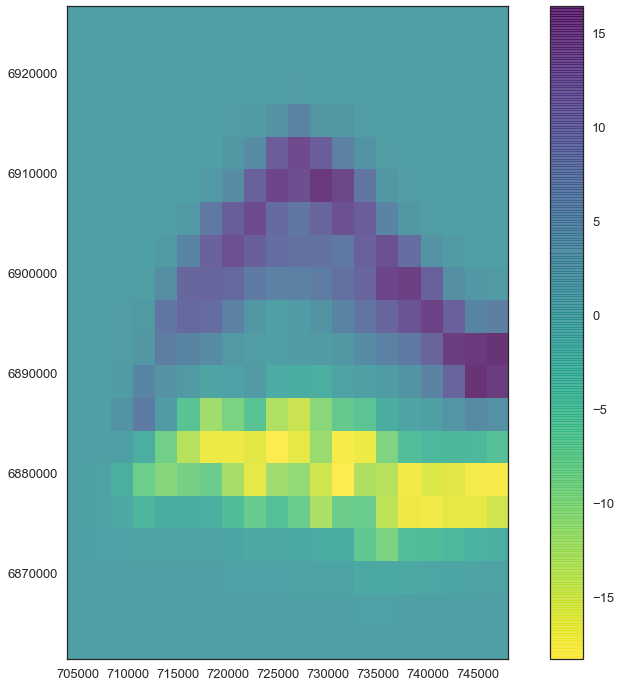

In [25]:
plt.imshow(gradx_true,
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
#cbar.set_label(r'$\mu$gal')
plt.show()

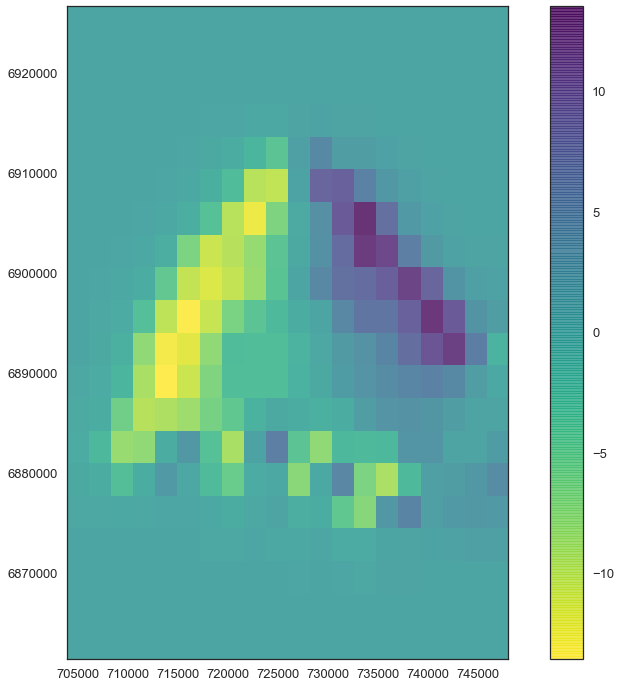

In [26]:
plt.imshow(grady_true,
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
#cbar.set_label(r'$\mu$gal')
plt.show()

In [14]:
#gp.plot_3d(geo_model_true, kwargs_plot_structured_grid={'opacity': .2})

## Test load data to generate model

In [59]:
geo_model = gp.create_model('Greenstone')
# Importing the data from csv files and settign extent and resolution
geo_model = gp.init_data(geo_model, [696000, 747000, 6863000, 6930000, -20000, 200], [50, 50, 50],
                         path_o="Data/tut_SandStone/SandStone_Foliations.csv",
                         path_i="Data/tut_SandStone/SandStone_Points.csv")

Active grids: ['regular']


In [60]:
gp.map_stack_to_surfaces(geo_model, {"EarlyGranite_Series": 'EarlyGranite',
                                     "BIF_Series": ('SimpleMafic2', 'SimpleBIF'),
                                     "SimpleMafic_Series": 'SimpleMafic1', 'Basement': 'basement'})

surface               series  order_surfaces    color  id
3  EarlyGranite  EarlyGranite_Series               1  #728f02   1
0  SimpleMafic2           BIF_Series               1  #015482   2
1     SimpleBIF           BIF_Series               2  #9f0052   3
2  SimpleMafic1   SimpleMafic_Series               1  #ffbe00   4
4      basement             Basement               1  #443988   5

In [61]:
geo_model.surfaces

surface               series  order_surfaces    color  id
3  EarlyGranite  EarlyGranite_Series               1  #728f02   1
0  SimpleMafic2           BIF_Series               1  #015482   2
1     SimpleBIF           BIF_Series               2  #9f0052   3
2  SimpleMafic1   SimpleMafic_Series               1  #ffbe00   4
4      basement             Basement               1  #443988   5

In [ ]:
# gp.set_interpolator(geo_model, theano_optimizer='fast_run',
#                     compile_theano=True)
# sol = gp.compute_model(geo_model)

In [15]:
geo_model.add_surface_values([2.61, 2.92, 3.1, 2.92, 2.61], ['density'])
geo_model.set_centered_grid(xy_ravel, resolution=[10, 10, 15], radius=5000)
geo_model.grid.centered_grid.kernel_centers
g = GravityPreprocessing(geo_model.grid.centered_grid)
tz = g.set_tz_kernel()
# gp.set_interpolator(geo_model,
#                     compile_theano=True,
#                     theano_optimizer='fast_compile',
#                     verbose=[])
gp.set_interpolator(geo_model, output=['gravity'], pos_density=1, gradient=False,
                    theano_optimizer='fast_run')
sol = gp.compute_model(geo_model)
grav = sol.fw_gravity

Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/opt/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/opt/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/opt/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: 

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
nugget grad              0.01
nugget scalar           1e-06


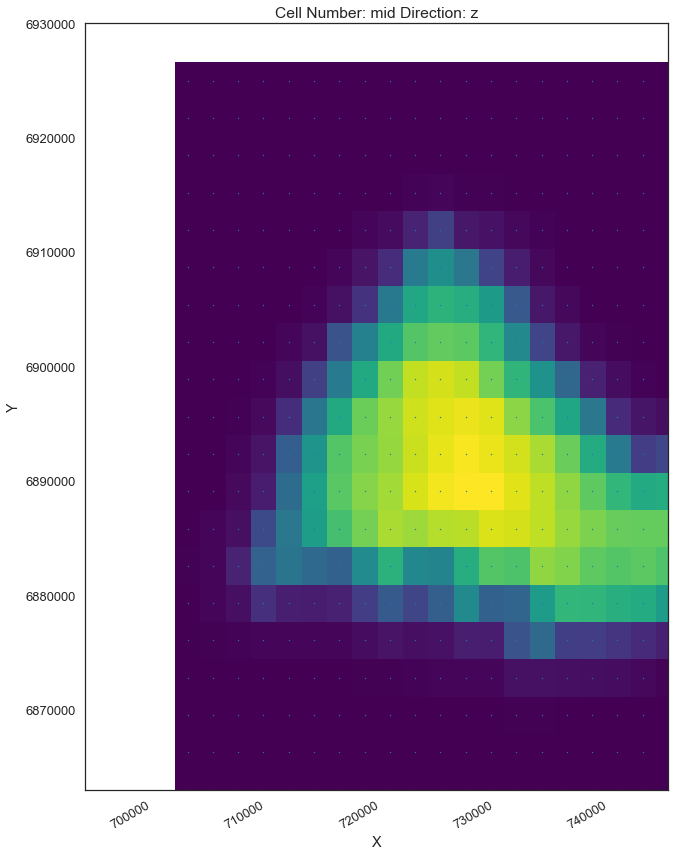

In [16]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
gp.plot_2d(geo_model, direction=['z'], height=7, show_results=False, show_data=False,
           show=False)
plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.imshow(sol.fw_gravity.reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower')
plt.show()

In [33]:
sol.fw_gravity.shape[0]

400

/Users/liangyang/Documents/Stanford/Research/ThesisMcMC/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


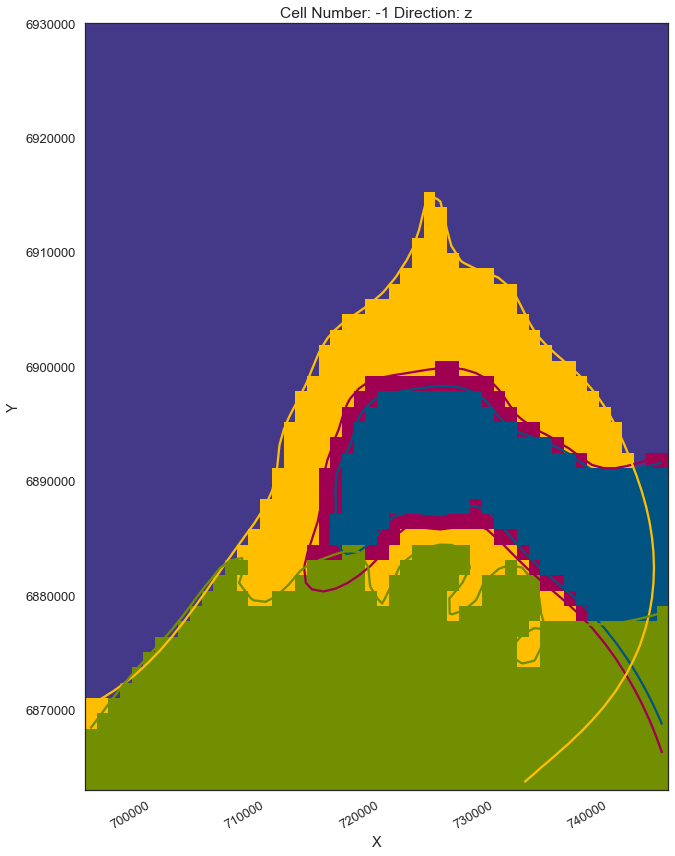

In [17]:
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False)
#plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
#plt.show()

In [18]:
gp.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})

In [23]:
sol.scalar_field_matrix[0]

array([ 0.01517247,  0.01756267,  0.019948  , ..., -0.97051499,
       -0.9690837 , -0.9676446 ])

In [21]:
sol.scalar_field_at_surface_points

array([[0.05677454, 0.        , 0.        , 0.        ],
       [0.        , 0.71998505, 0.71403933, 0.        ],
       [0.        , 0.        , 0.        , 0.55517814]])

In [30]:
sol


Lithology ids 
  [5. 5. 5. ... 5. 5. 5.] 

In [ ]:
#

## Generate priors

In [27]:
num_real = 300

boundaries1 = np.zeros((num_real, 4))
boundaries2 = np.zeros((num_real, 4))
boundaries3 = np.zeros((num_real, 4))
scalar_fields1 = np.zeros((num_real, 50*50*50))
scalar_fields2 = np.zeros((num_real, 50*50*50))
scalar_fields3 = np.zeros((num_real, 50*50*50))
lithos = np.zeros((num_real, 50*50*50))
fw_gravities = np.zeros((num_real, 400))

for i in range(num_real):
    geo_model = gp.create_model('Greenstone')
    # Importing the data from csv files and settign extent and resolution
    geo_model = gp.init_data(geo_model, [696000, 747000, 6863000, 6930000, -20000, 200], [50, 50, 50],
                             path_o='Data/tut_SandStone/SandStone_Foliations'+str(i)+'.csv',
                             path_i='Data/tut_SandStone/SandStone_Points'+str(i)+'.csv')
    gp.map_stack_to_surfaces(geo_model, {"EarlyGranite_Series": 'EarlyGranite',
                                     "BIF_Series": ('SimpleMafic2', 'SimpleBIF'),
                                     "SimpleMafic_Series": 'SimpleMafic1', 'Basement': 'basement'})
    geo_model.add_surface_values([2.61, 2.92, 3.1, 2.92, 2.61], ['density'])
    geo_model.set_centered_grid(xy_ravel, resolution=[10, 10, 15], radius=5000)
    #geo_model.grid.centered_grid.kernel_centers
    #g = GravityPreprocessing(geo_model.grid.centered_grid)
    #tz = g.set_tz_kernel()

    gp.set_interpolator(geo_model, output=['gravity'], pos_density=1, gradient=False,
                        theano_optimizer='fast_run')
    sol = gp.compute_model(geo_model)
    scalar_fields1[i, :] = sol.scalar_field_matrix[0]
    scalar_fields2[i, :] = sol.scalar_field_matrix[1]
    scalar_fields3[i, :] = sol.scalar_field_matrix[2]
    boundaries1[i, :] = sol.scalar_field_at_surface_points[0]
    boundaries2[i, :] = sol.scalar_field_at_surface_points[1]
    boundaries3[i, :] = sol.scalar_field_at_surface_points[2]
    lithos[i, :] = sol.lith_block
    fw_gravities[i, :] = sol.fw_gravity
    

Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]
Active grids: ['regular']
Active grids: ['regular' 'centered']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]


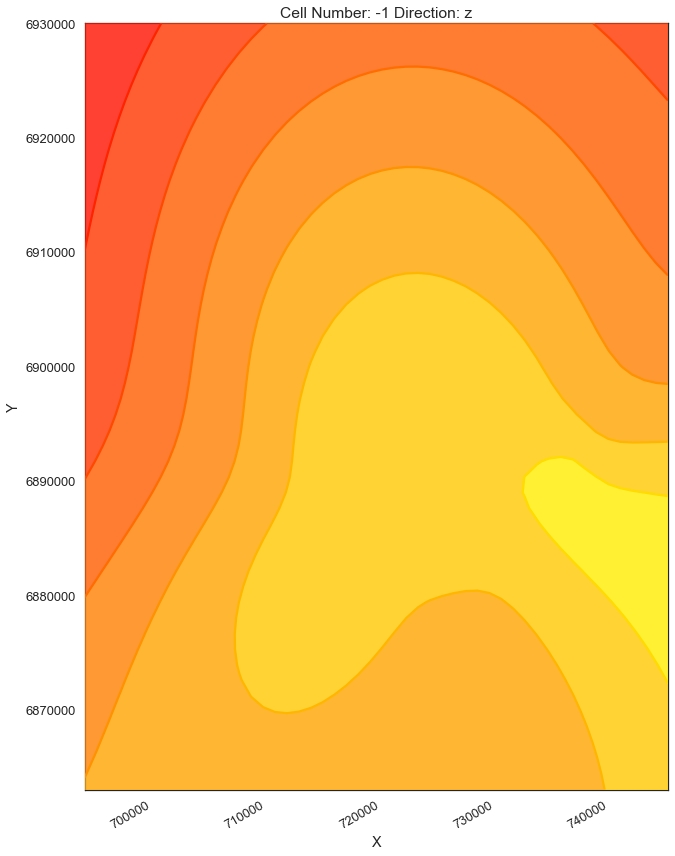

In [284]:
# visualize potential fields
#scalar_fields1

gp.plot_2d(geo_model, cell_number=-1, direction='z', series_n=1, show_data=False, show_scalar=True, show_lith=False, show_boundaries=False)

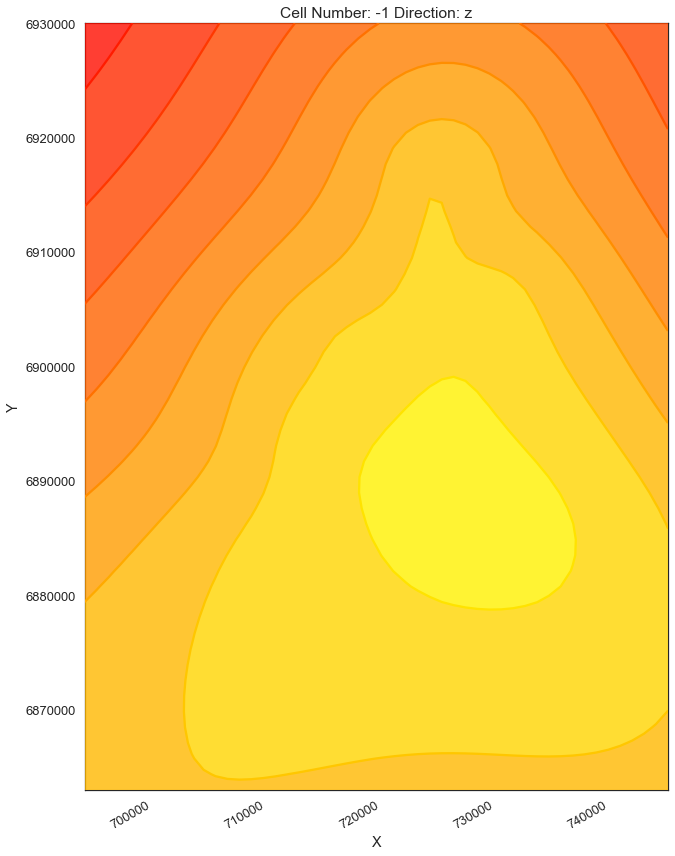

In [285]:
gp.plot_2d(geo_model, cell_number=-1, direction='z', series_n=2, show_data=False, show_scalar=True, show_lith=False, show_boundaries=False)

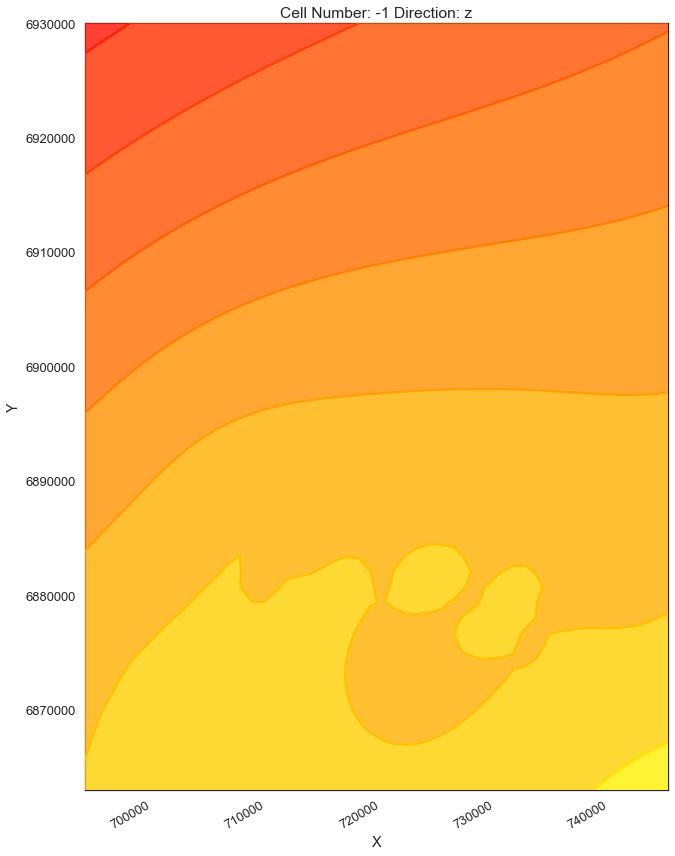

In [287]:
gp.plot_2d(geo_model, cell_number=-1, direction='z', series_n=0, show_data=False, show_scalar=True, show_lith=False, show_boundaries=False)

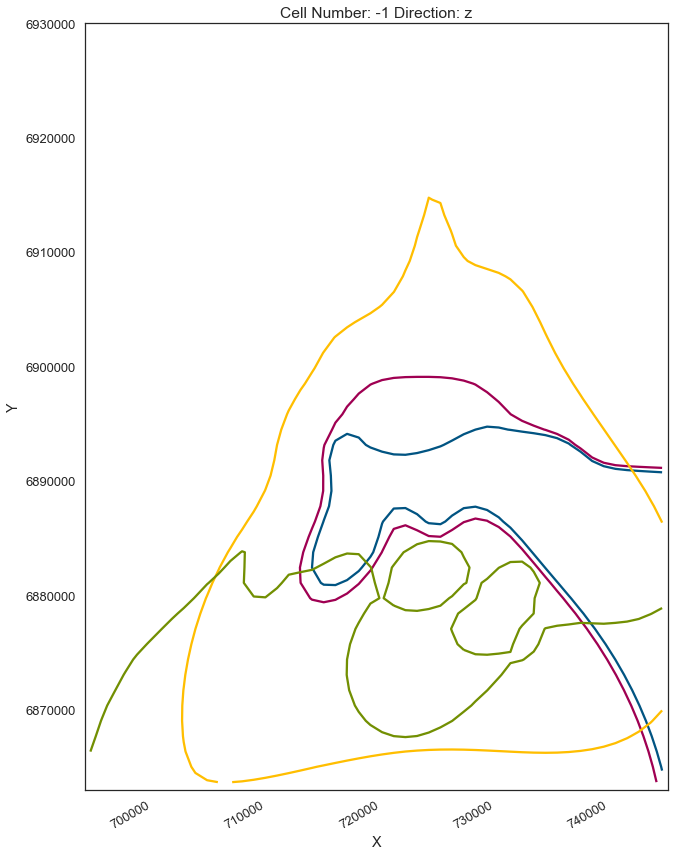

In [288]:
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data=False, show_scalar=False, show_lith=False, show_boundaries=True)

Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...


/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/liangyang/anaconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning:

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]


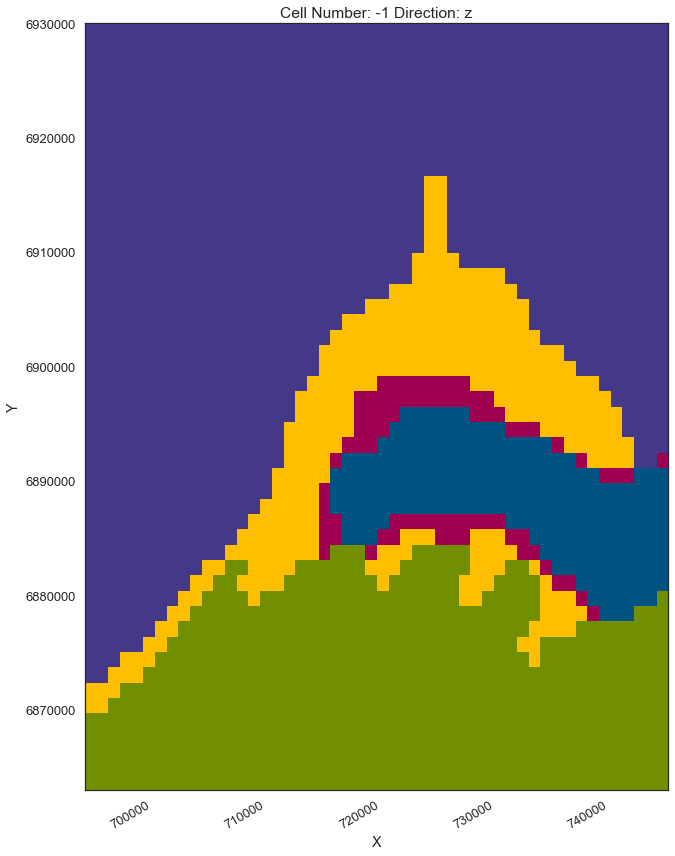

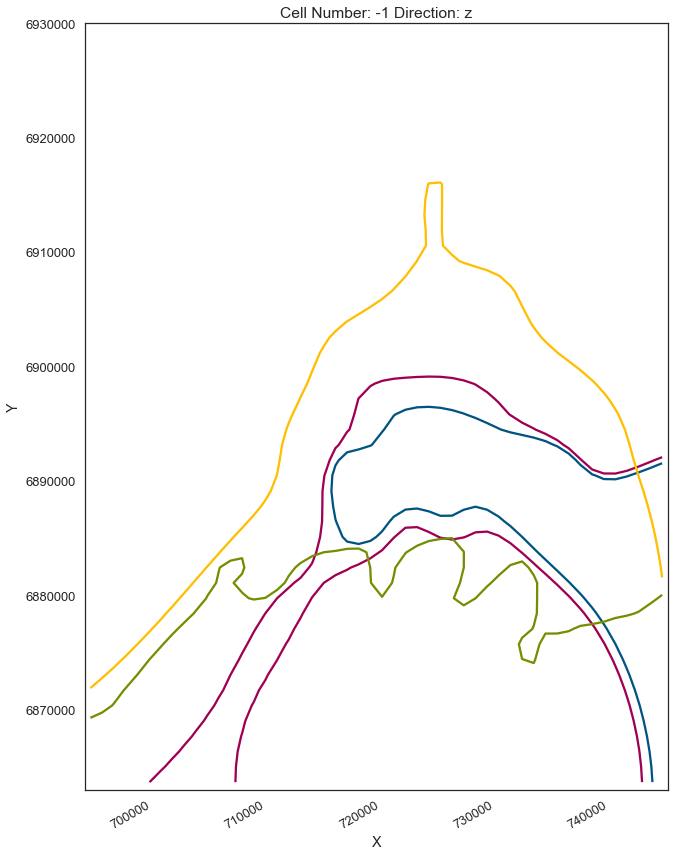

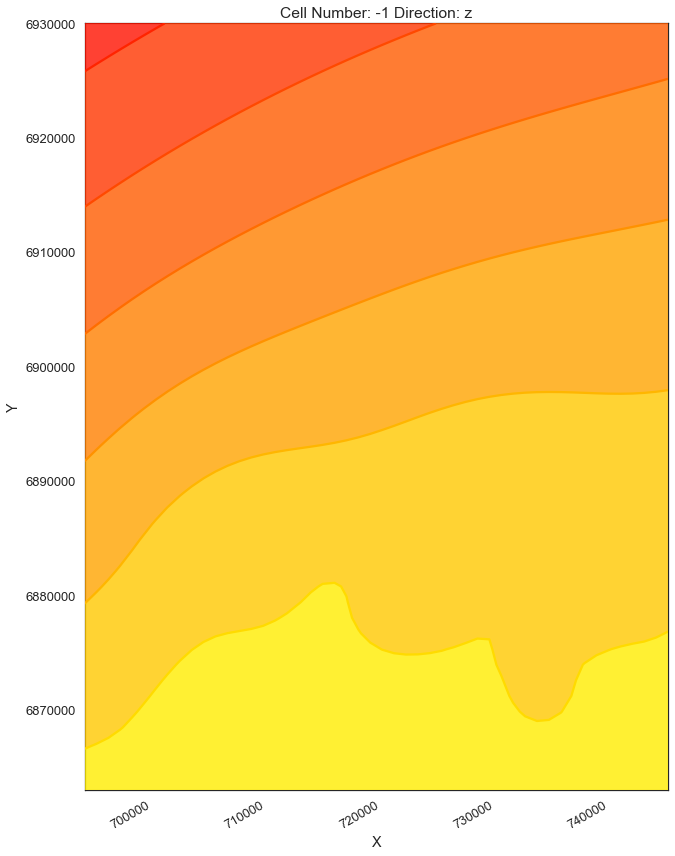

In [311]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
for i in range(1):
    geo_model = gp.create_model('Greenstone')
    # Importing the data from csv files and settign extent and resolution
    geo_model = gp.init_data(geo_model, [696000, 747000, 6863000, 6930000, -20000, 200], [50, 50, 50],
                             path_o='Data/tut_SandStone/SandStone_Foliations'+str(i)+'.csv',
                             path_i='Data/tut_SandStone/SandStone_Points'+str(i)+'.csv')
    gp.map_stack_to_surfaces(geo_model, {"EarlyGranite_Series": 'EarlyGranite',
                                     "BIF_Series": ('SimpleMafic2', 'SimpleBIF'),
                                     "SimpleMafic_Series": 'SimpleMafic1', 'Basement': 'basement'})

    gp.set_interpolator(geo_model, theano_optimizer='fast_run')
    sol = gp.compute_model(geo_model)
    gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False, show_boundaries = False)
    gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False, show_boundaries = True, show_scalar=False, show_lith=False)
    gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False, show_boundaries = False, show_scalar=True, show_lith=False)

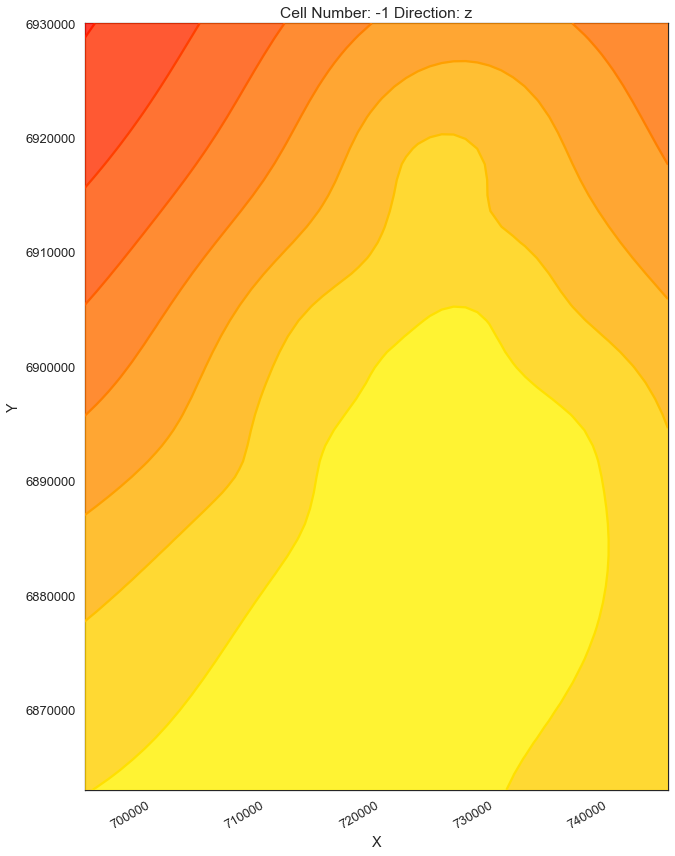

In [313]:
gp.plot_2d(geo_model, cell_number=-1, direction='z',series_n=2, show_data = False, show_boundaries = False, show_scalar=True, show_lith=False)

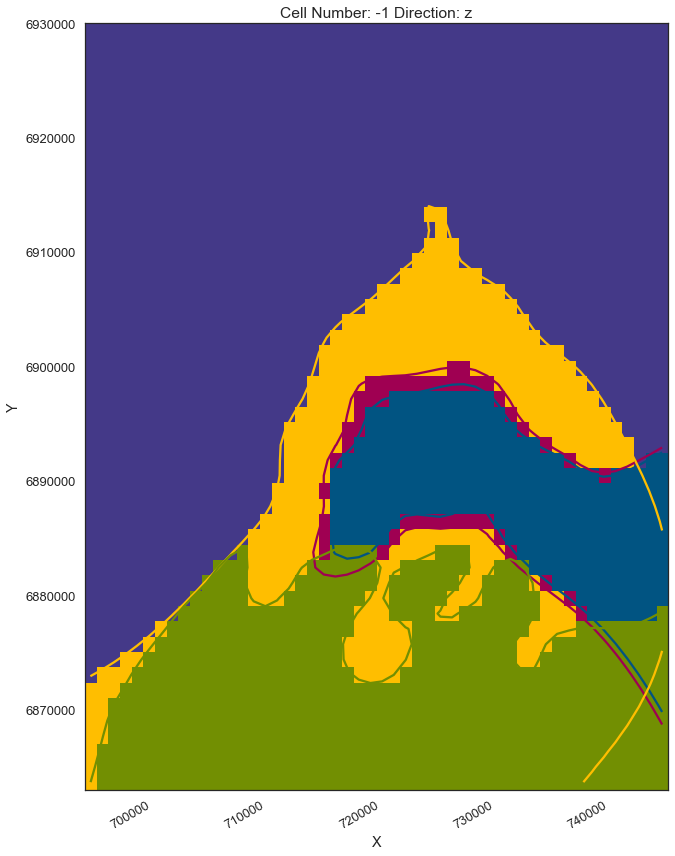

In [28]:
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False)

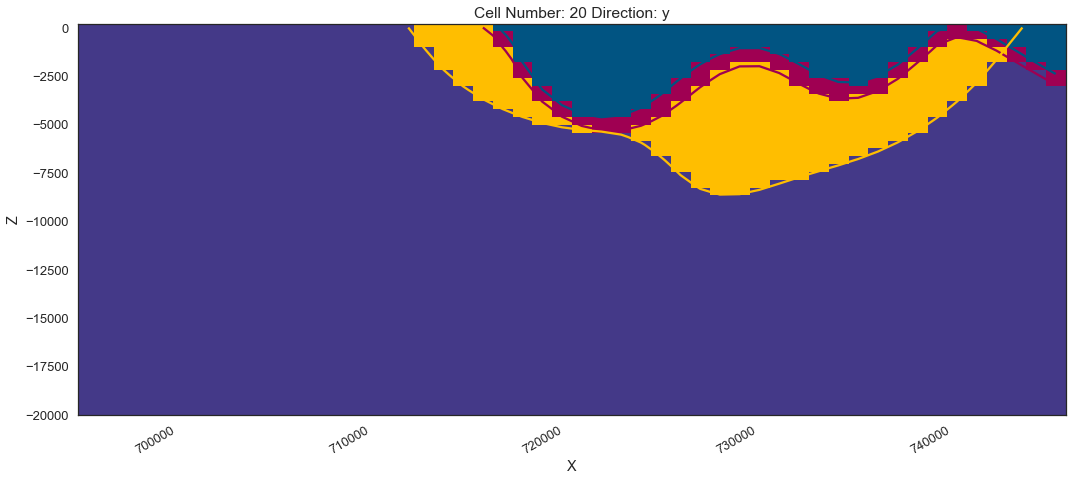

In [29]:
gp.plot_2d(geo_model, cell_number=20, direction='y', show_data = False)

In [56]:
#gp.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})

In [30]:
geo_model.surfaces

surface               series  order_surfaces    color  id  density
3  EarlyGranite  EarlyGranite_Series               1  #728f02   1     2.61
0  SimpleMafic2           BIF_Series               1  #015482   2     2.92
1     SimpleBIF           BIF_Series               2  #9f0052   3     3.10
2  SimpleMafic1   SimpleMafic_Series               1  #ffbe00   4     2.92
4      basement             Basement               1  #443988   5     2.61

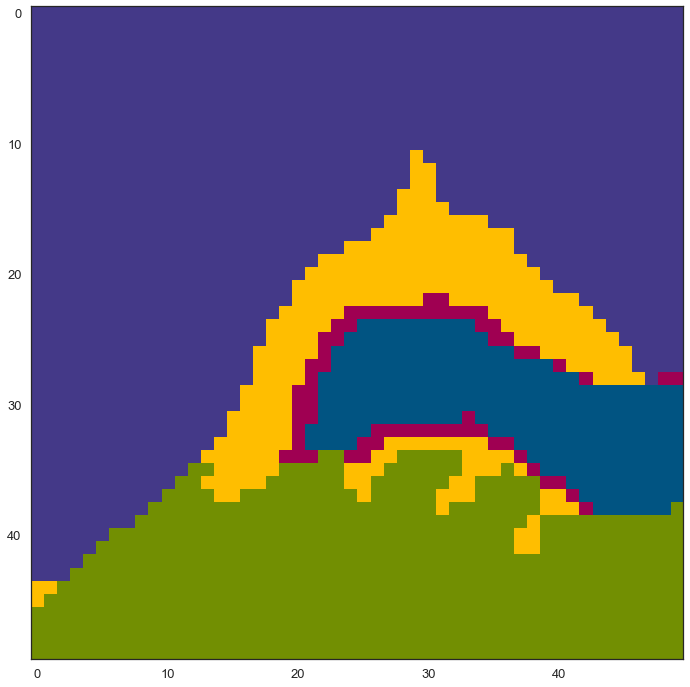

In [25]:
#visualize some realizations
cmap = colors.ListedColormap(['#728f02', '#015482', '#9f0052', '#ffbe00', '#443988'])
litho_field = geo_model_true.solutions.lith_block.reshape([50, 50, 50])
plt.imshow(np.rot90(litho_field[:,:, -1]),cmap = cmap)

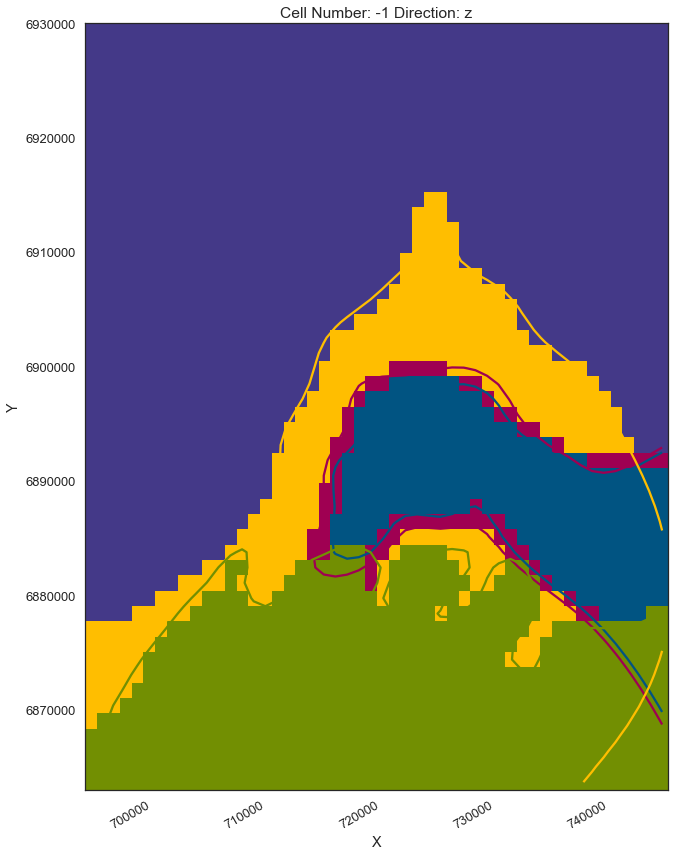

In [36]:
#visualize some realizations
geo_model.solutions.lith_block = lithos[3]
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False)


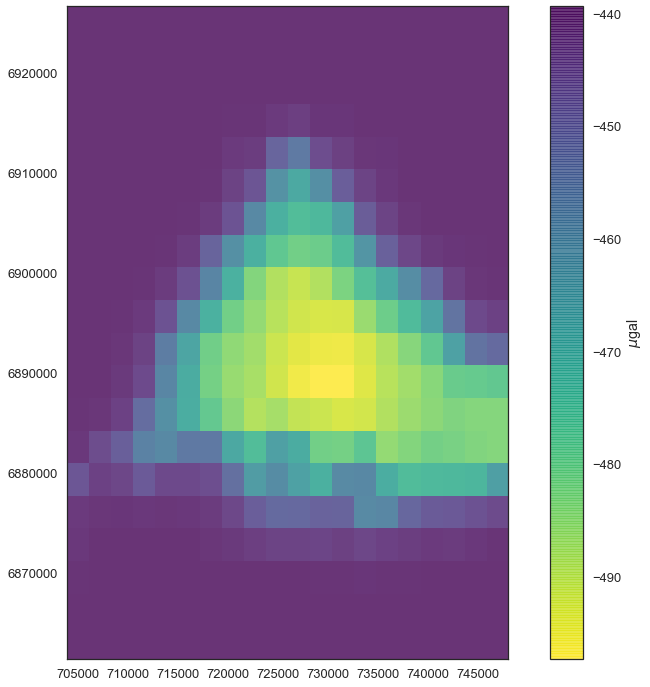

In [31]:
#visualize forward responses
plt.imshow(fw_gravities[3].reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
cbar.set_label(r'$\mu$gal')
plt.show()

Text(0, 0.5, '$\\mu$gal')

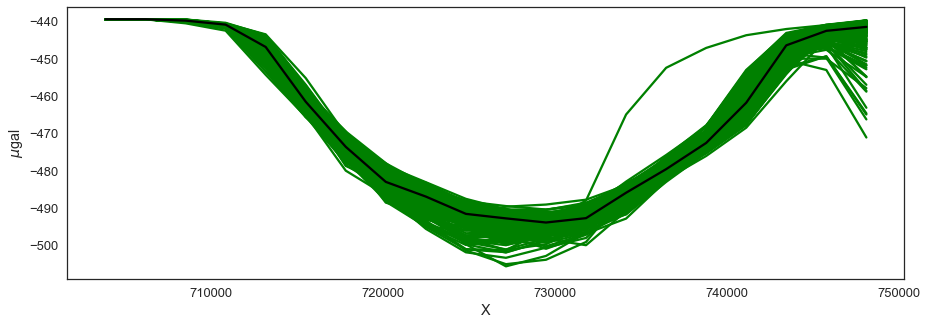

In [205]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gravities[i].reshape(grav_res, grav_res)[10, :], color='green')

plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             grav_true.reshape(grav_res, grav_res)[10, :], color='black')
plt.xlabel('X')
plt.ylabel(r'$\mu$gal')

Text(0, 0.5, '$\\mu$gal')

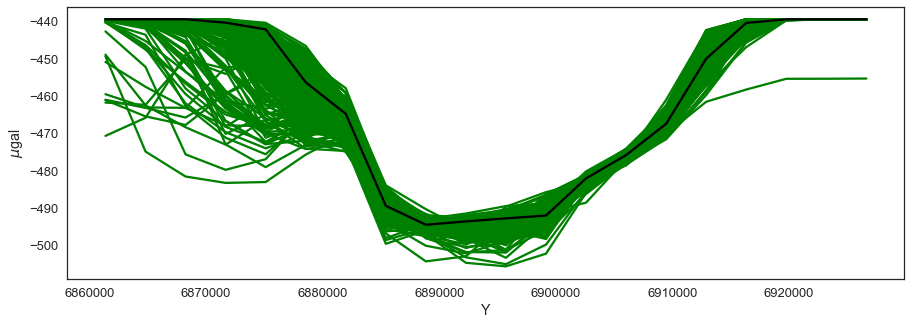

In [206]:
#visualize forward responses profiles

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             fw_gravities[i].reshape(grav_res, grav_res)[:, 10], color='green')

plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     num = 20), 
             grav_true.reshape(grav_res, grav_res)[:, 10], color='black')
plt.xlabel('Y')
plt.ylabel(r'$\mu$gal')



In [142]:
# compute forward responses' gradients
fw_gradients_x = []
fw_gradients_y = []
for i in range(num_real):
    fw_gradients_x.append(np.gradient(fw_gravities[i].reshape(grav_res, grav_res), axis = 0))
    fw_gradients_y.append(np.gradient(fw_gravities[i].reshape(grav_res, grav_res), axis = 1))

Text(0, 0.5, 'Gradient X')

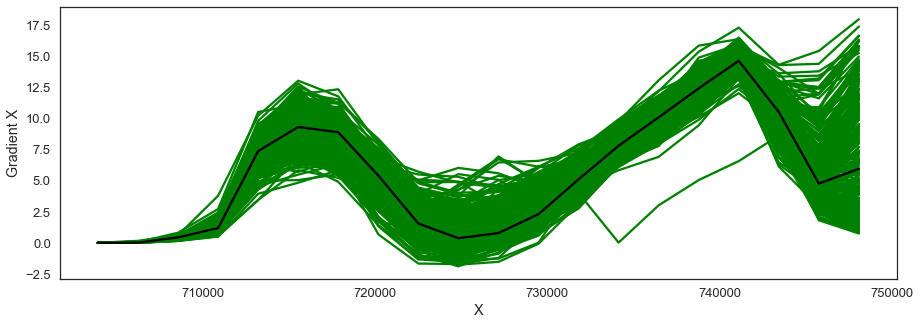

In [207]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gradients_x[i][10, :], color='green')

plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             gradx_true[10, :], color='black')
plt.xlabel('X')
plt.ylabel('Gradient X')

Text(0, 0.5, 'Gradient X')

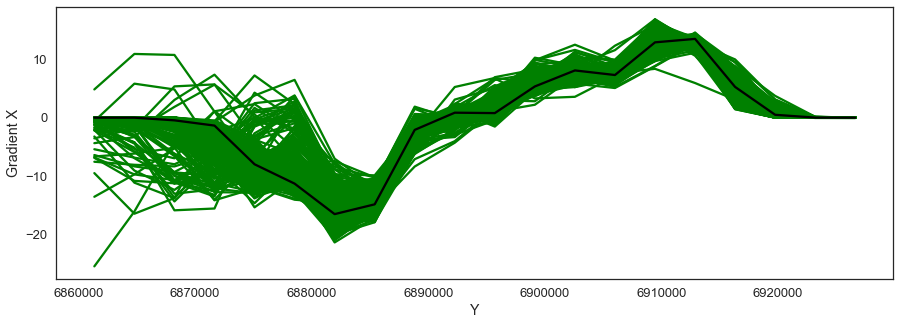

In [208]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             fw_gradients_x[i][:, 10], color='green')

plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     num = 20), 
             gradx_true[:, 10], color='black')
plt.xlabel('Y')
plt.ylabel('Gradient X')

Text(0, 0.5, 'Gradient Y')

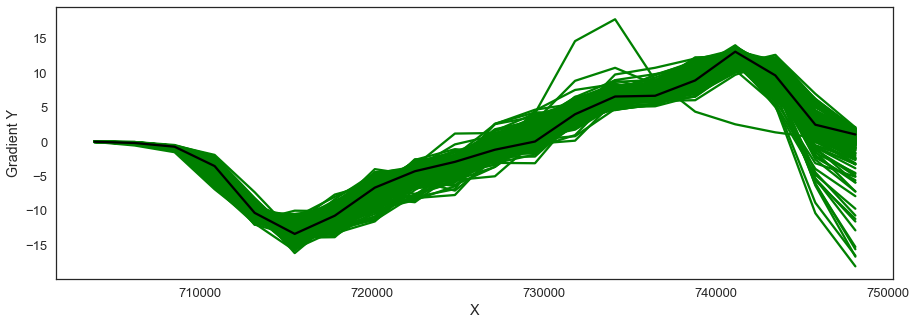

In [209]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gradients_y[i][10, :], color='green')

plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             grady_true[10, :], color='black')
plt.xlabel('X')
plt.ylabel('Gradient Y')

Text(0, 0.5, 'Gradient Y')

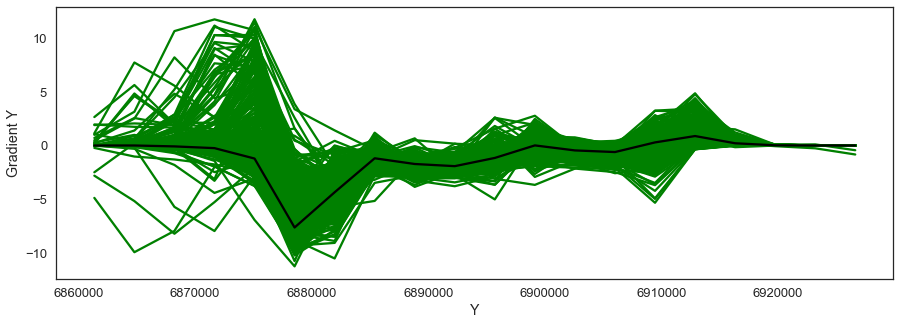

In [210]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             fw_gradients_y[i][:, 10], color='green')

plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     num = 20), 
             grady_true[:, 10], color='black')
plt.xlabel('Y')
plt.ylabel('Gradient Y')

## Do PCA on priors

In [58]:
# Do PCA
M = np.concatenate((scalar_fields1, scalar_fields2, scalar_fields3, 
                    boundaries1, boundaries2, boundaries3), axis=1)

D_utilized = scale(M, with_std = False)
#D_utilized = copy.deepcopy(M)
pca = PCA(n_components=min(D_utilized.shape[0], D_utilized.shape[1]))
pca.fit(D_utilized)
D_scores = pca.transform(D_utilized)

In [47]:
M.shape

(300, 375012)

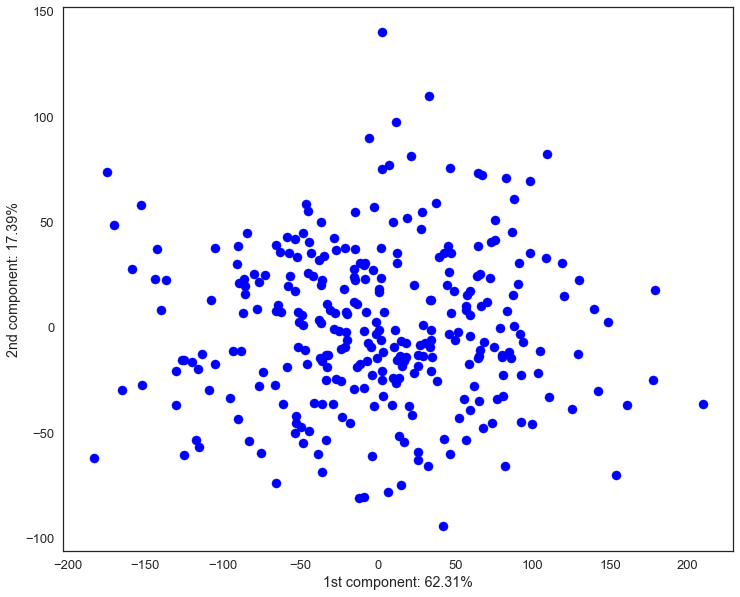

In [59]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(D_scores[:, 0], D_scores[:, 1], c = 'blue')
plt.xlabel("1st component: " + str(round(pca.explained_variance_ratio_[0]*100,2)) + "%")
plt.ylabel("2nd component: " + str(round(pca.explained_variance_ratio_[1]*100,2)) + "%")
plt.show()

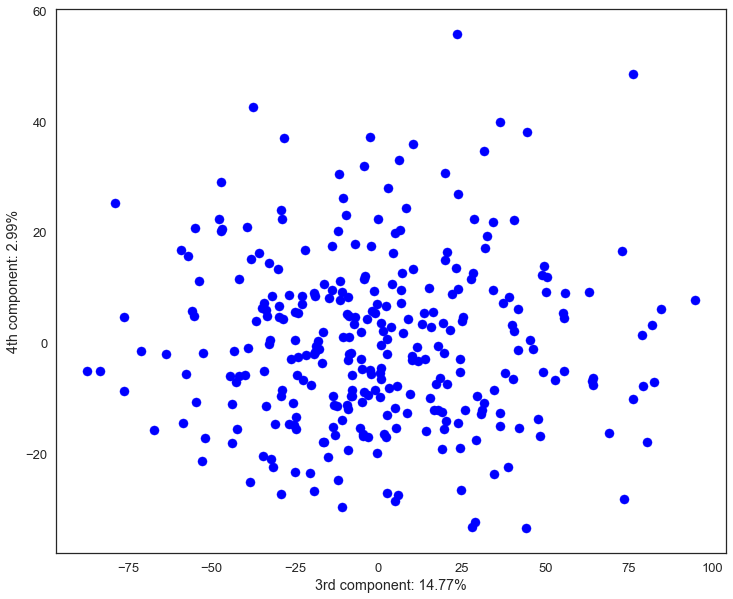

In [174]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(D_scores[:, 2], D_scores[:, 3], c = 'blue')
plt.xlabel("3rd component: " + str(round(pca.explained_variance_ratio_[2]*100,2)) + "%")
plt.ylabel("4th component: " + str(round(pca.explained_variance_ratio_[3]*100,2)) + "%")
plt.show()

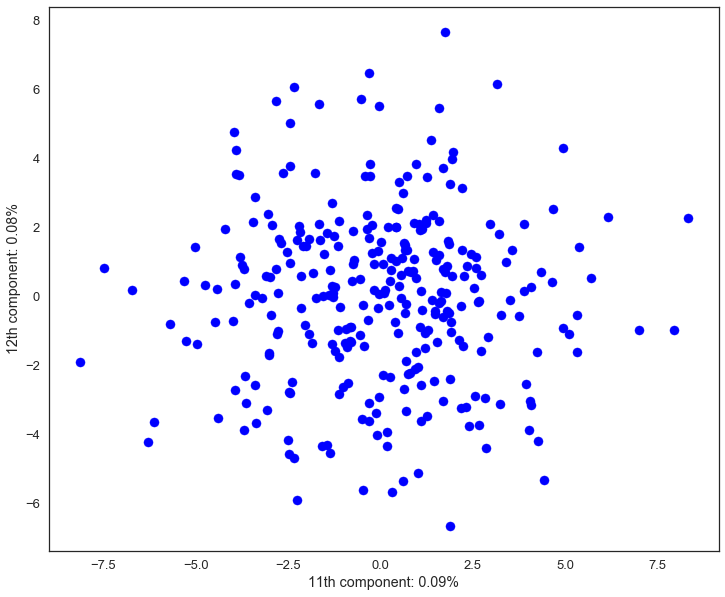

In [173]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(D_scores[:, 10], D_scores[:, 11], c = 'blue')
plt.xlabel("11th component: " + str(round(pca.explained_variance_ratio_[10]*100,2)) + "%")
plt.ylabel("12th component: " + str(round(pca.explained_variance_ratio_[11]*100,2)) + "%")
plt.show()

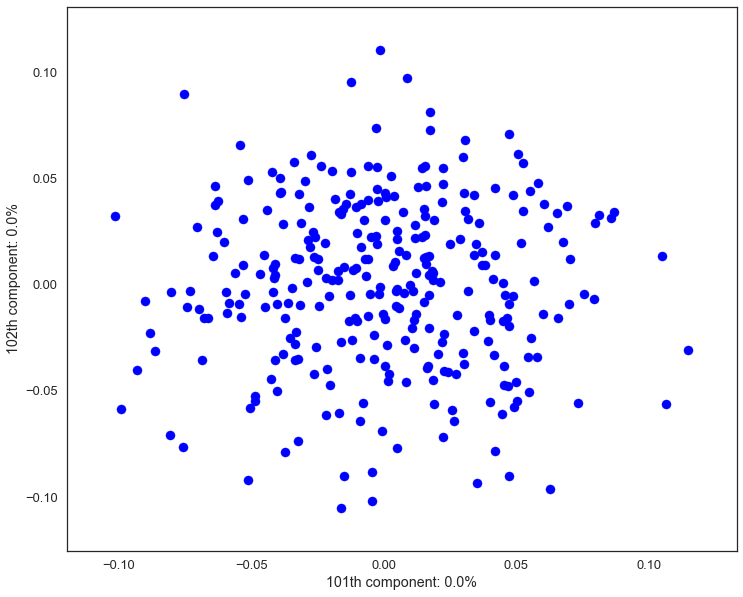

In [175]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(D_scores[:, 100], D_scores[:, 101], c = 'blue')
plt.xlabel("101th component: " + str(round(pca.explained_variance_ratio_[100]*100,2)) + "%")
plt.ylabel("102th component: " + str(round(pca.explained_variance_ratio_[101]*100,2)) + "%")
plt.show()

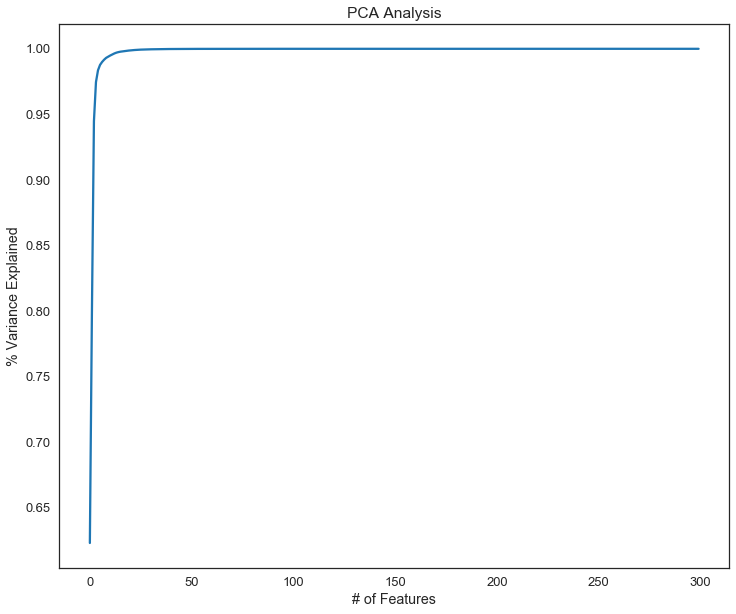

In [60]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(variance)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

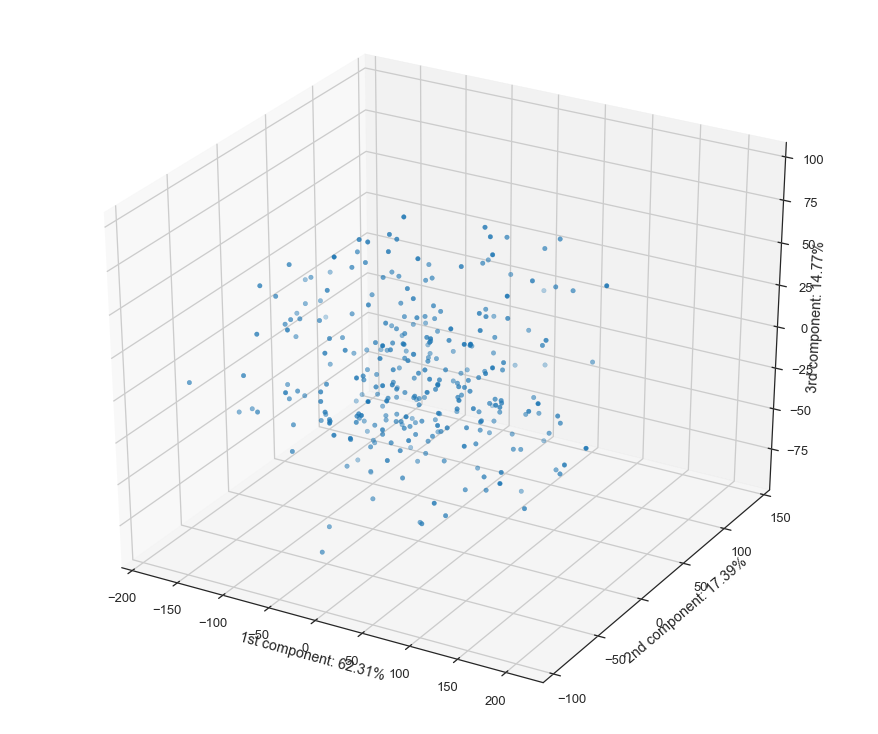

In [50]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(D_scores[:,0], D_scores[:,1], D_scores[:,2])
ax.set_xlabel("1st component: " + str(round(pca.explained_variance_ratio_[0]*100,2)) + "%")
ax.set_ylabel("2nd component: " + str(round(pca.explained_variance_ratio_[1]*100,2)) + "%")
ax.set_zlabel("3rd component: " + str(round(pca.explained_variance_ratio_[2]*100,2)) + "%")
plt.show()

In [52]:
dims = 50*50*50

In [314]:
pca.components_[0][dims:dims+1]

array([6.24999947e-05])

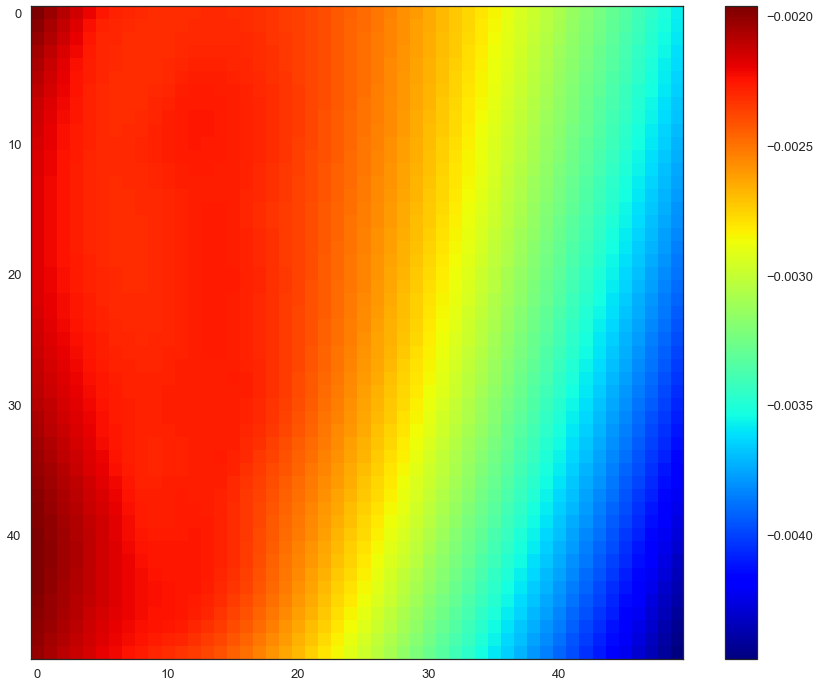

In [58]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(pca.components_[0][:dims].reshape([50, 50, 50])[:, :, -1],cmap = 'jet')
plt.colorbar()

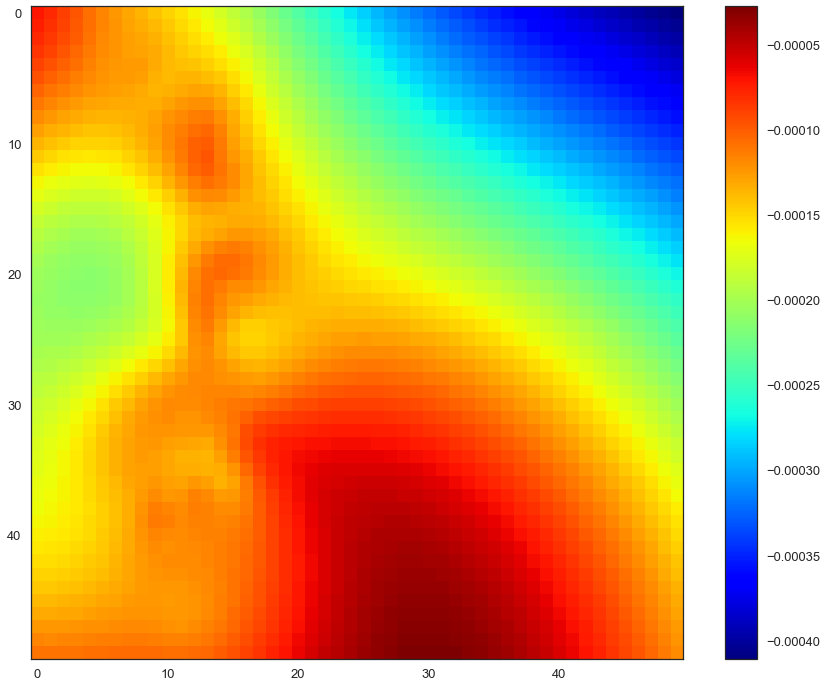

In [59]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(pca.components_[1][:dims].reshape([50, 50, 50])[:, :, -1],cmap = 'jet')
plt.colorbar()

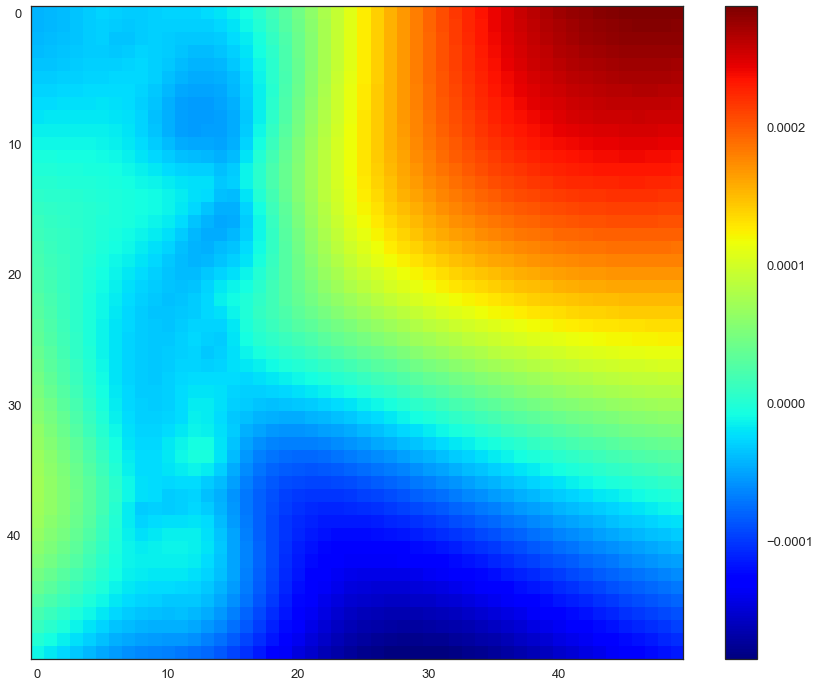

In [61]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(pca.components_[2][:dims].reshape([50, 50, 50])[:, :, -1],cmap = 'jet')
plt.colorbar()

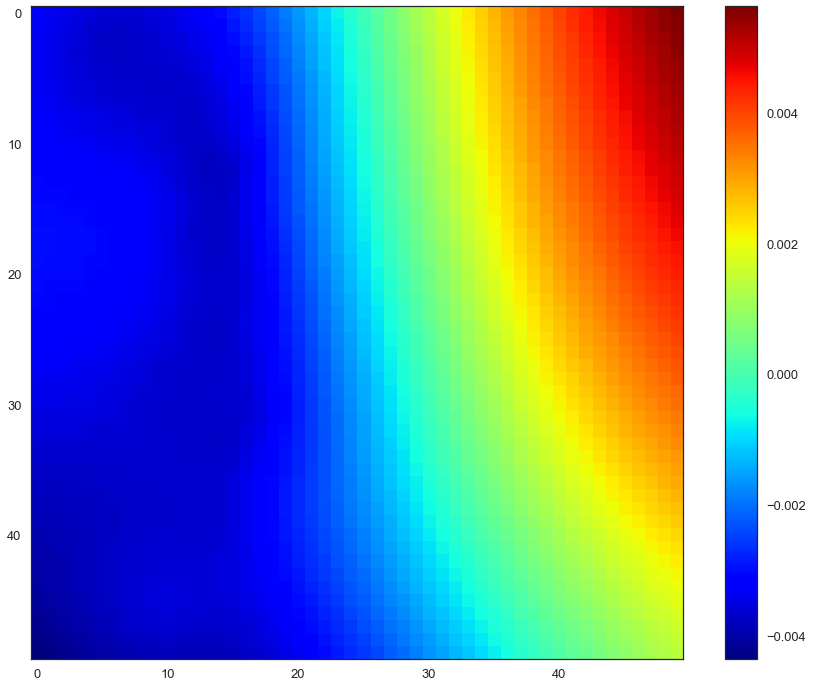

In [66]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(pca.components_[3][:dims].reshape([50, 50, 50])[:, :, -1],cmap = 'jet')
plt.colorbar()

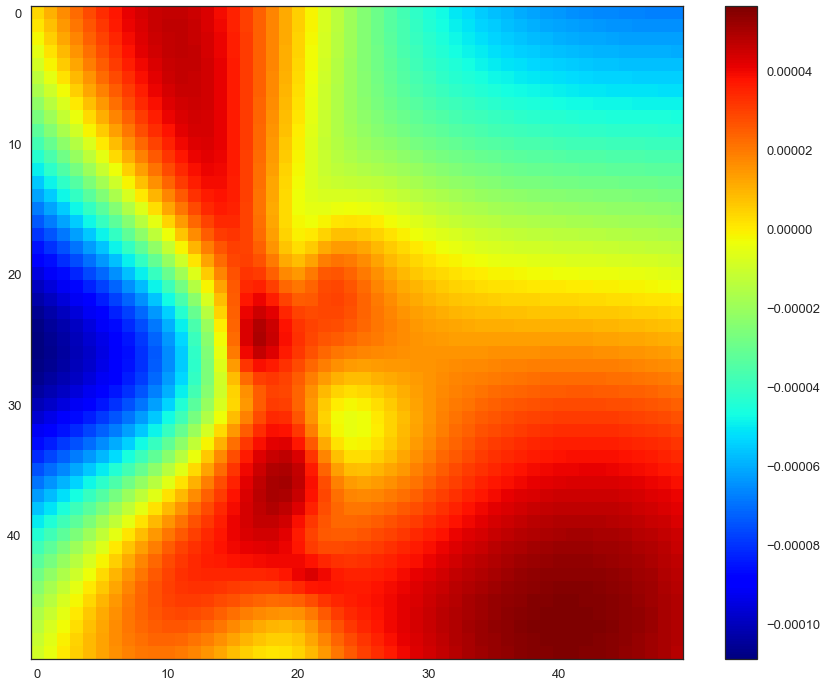

In [65]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(pca.components_[3][dims:2*dims].reshape([50, 50, 50])[:, :, -1],cmap = 'jet')
plt.colorbar()

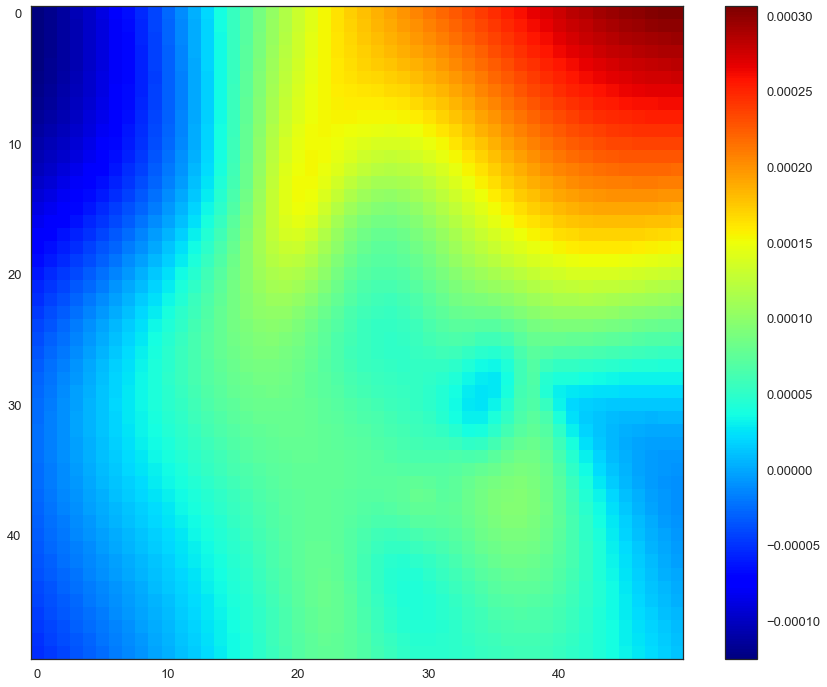

In [70]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(pca.components_[3][2*dims:3*dims].reshape([50, 50, 50])[:, :, -1],cmap = 'jet')
plt.colorbar()

In [ ]:
pca.components_[0][dims:2*dims]

In [80]:
fw_gravities

array([[-439.36363219, -439.36363219, -439.36363219, ..., -439.36363219,
        -439.36363219, -439.36363219],
       [-439.36363219, -439.36363219, -439.36363219, ..., -439.36363219,
        -439.36363219, -439.36363219],
       [-439.36363219, -439.36363219, -439.36363219, ..., -439.36363219,
        -439.36363219, -439.36363219],
       ...,
       [-439.36363219, -439.36363219, -439.36363219, ..., -439.36363219,
        -439.36363219, -439.36363219],
       [-439.36363219, -439.36363219, -439.36363219, ..., -439.36363219,
        -439.36363219, -439.36363219],
       [-439.36363219, -439.36363219, -439.36363219, ..., -439.36363219,
        -439.36363219, -439.36363219]])

In [83]:
M_data = np.concatenate((grav_true.reshape((1, 400)), fw_gravities), axis = 0)
D_utilized_data = scale(M_data, with_std = False)
pca_data = PCA(n_components=min(D_utilized_data.shape[0], D_utilized_data.shape[1]))
pca_data.fit(D_utilized_data)
D_scores_data = pca_data.transform(D_utilized_data)

In [74]:
fw_gravities.shape

(300, 400)

In [78]:
M_data.shape

(301, 400)

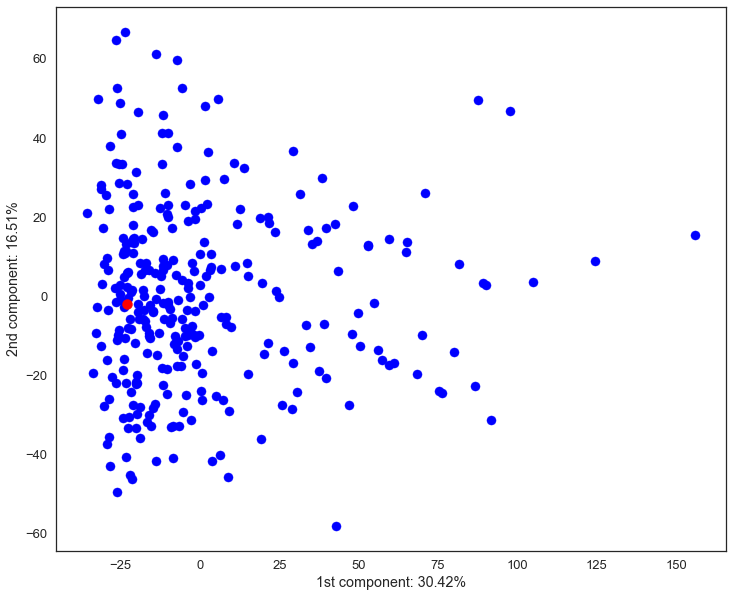

In [84]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(D_scores_data[1:, 0], D_scores_data[1:, 1], c = 'blue')
plt.scatter(D_scores_data[0, 0], D_scores_data[0, 1], c = 'red', s = 100)
plt.xlabel("1st component: " + str(round(pca_data.explained_variance_ratio_[0]*100,2)) + "%")
plt.ylabel("2nd component: " + str(round(pca_data.explained_variance_ratio_[1]*100,2)) + "%")
plt.show()

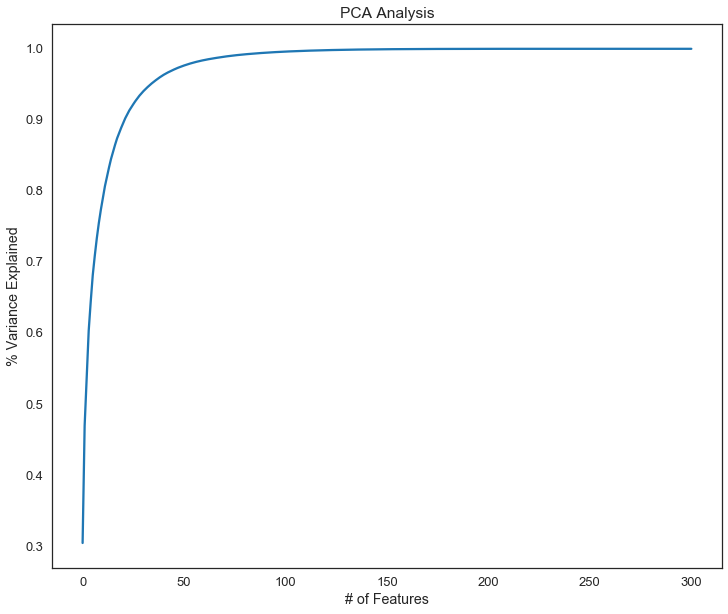

In [85]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
variance = pca_data.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(variance)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

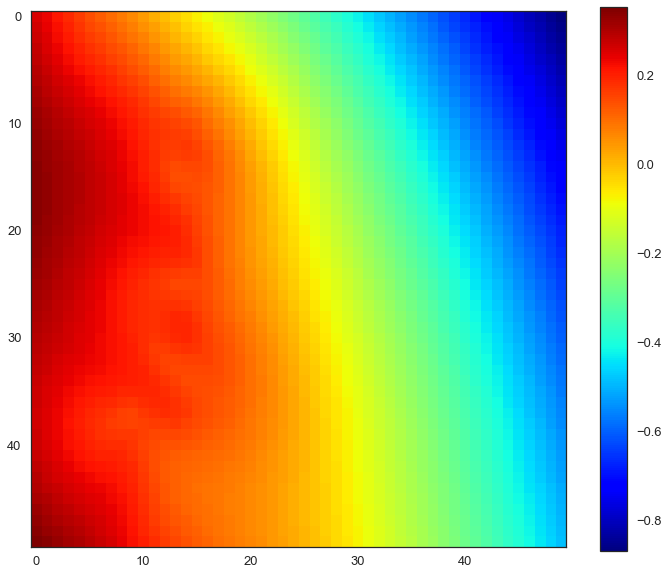

In [88]:
# Reconstruct
scores_recon= copy.deepcopy(D_scores)
X_projected_prev = pca.inverse_transform(scores_recon[0,:])
X_projected_prev = X_projected_prev + np.mean(M, axis = 0)
X_projected_grid1 = X_projected_prev[:dims].reshape([50, 50, 50])
X_projected_grid2 = X_projected_prev[dims:2*dims].reshape([50, 50, 50])
X_projected_grid3 = X_projected_prev[2*dims:3*dims].reshape([50, 50, 50])
plt.imshow(X_projected_grid1[:,:,-1], cmap = 'jet')
plt.colorbar()

In [97]:
test.shape

(50, 50, 50)

In [100]:
boundaries1[0]

array([0.16315592, 0.        , 0.        , 0.        ])

In [99]:
boundaries2[0]

array([0.        , 0.68980333, 0.68455168, 0.        ])

In [101]:
boundaries3[0]

array([0.        , 0.        , 0.        , 0.64999694])

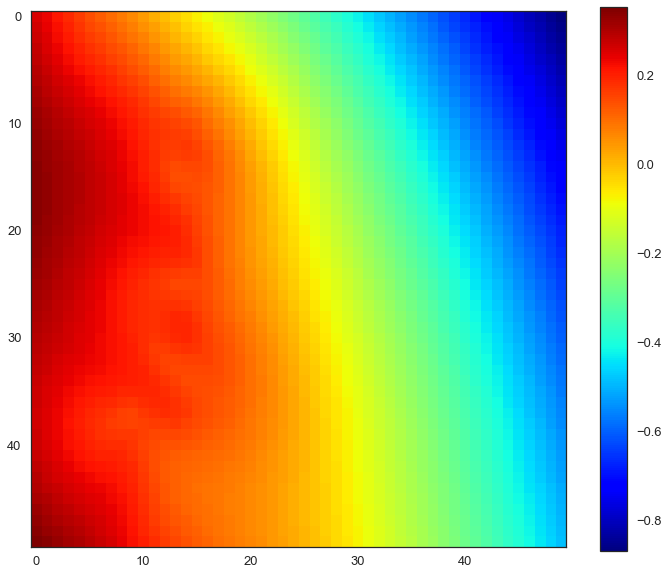

In [95]:
test = scalar_fields1[0].reshape([50, 50, 50])
plt.imshow(test[:,:,-1], cmap = 'jet')
plt.colorbar()


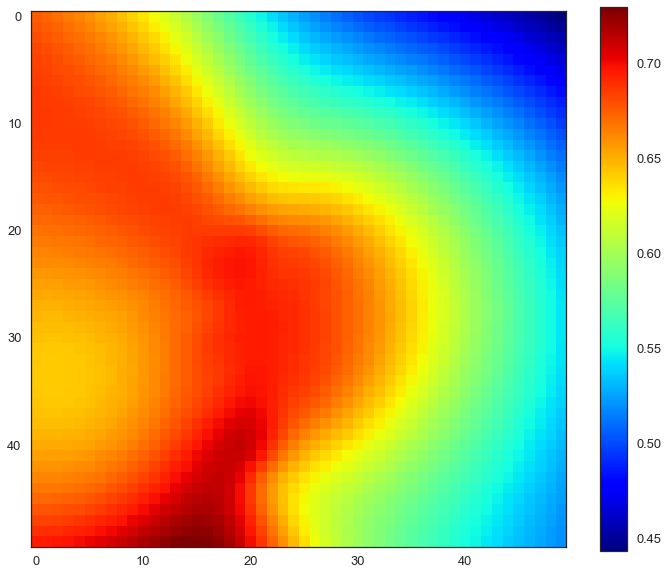

In [93]:
plt.imshow(X_projected_grid2[:,:,-1], cmap = 'jet')
plt.colorbar()

In [ ]:
litho = np.ones(X_projected_prev[:dims].shape[0])*5
for j in range(litho.shape[0]):
    if X_projected_prev[:dims][j] >= X_projected_prev[3*dims:3*dims+1]:
        litho[j] = 1
    elif (X_projected_prev[dims:2*dims][j] < X_projected_prev[3*dims+5:3*dims+6]) & (X_projected_prev[dims:2*dims][j] >= X_projected_prev[3*dims+6:3*dims+7]):
        litho[j] = 3
    elif X_projected_prev[dims:2*dims][j] >= X_projected_prev[3*dims+5:3*dims+6]:
        litho[j] = 2
    elif X_projected_prev[2*dims:3*dims][j] >= X_projected_prev[3*dims+11:]:
        litho[j] = 4
        

In [322]:
pca.components_[0][3*dims+6]

0.0001564865704977087

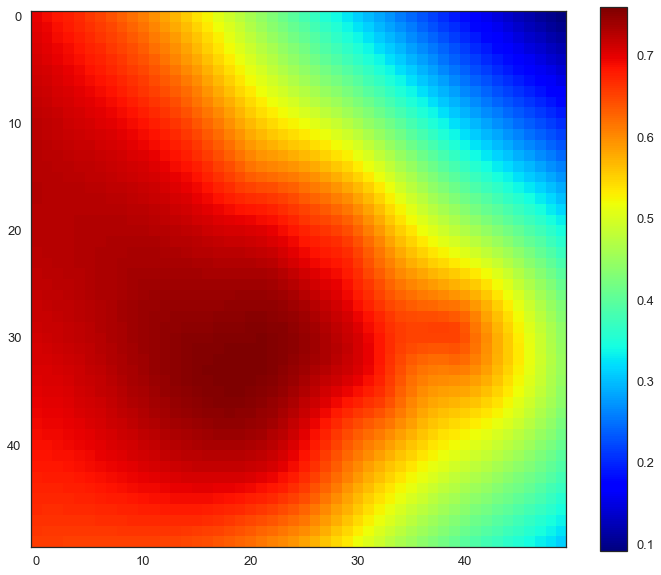

In [92]:
plt.imshow(X_projected_grid3[:,:,-1], cmap = 'jet')
plt.colorbar()

In [94]:
X_projected_prev[:dims].shape

(125000,)

In [102]:
geo_model.surfaces

surface               series  order_surfaces    color  id  density
3  EarlyGranite  EarlyGranite_Series               1  #728f02   1     2.61
0  SimpleMafic2           BIF_Series               1  #015482   2     2.92
1     SimpleBIF           BIF_Series               2  #9f0052   3     3.10
2  SimpleMafic1   SimpleMafic_Series               1  #ffbe00   4     2.92
4      basement             Basement               1  #443988   5     2.61

/Users/liangyang/Documents/Stanford/Research/ThesisMcMC/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


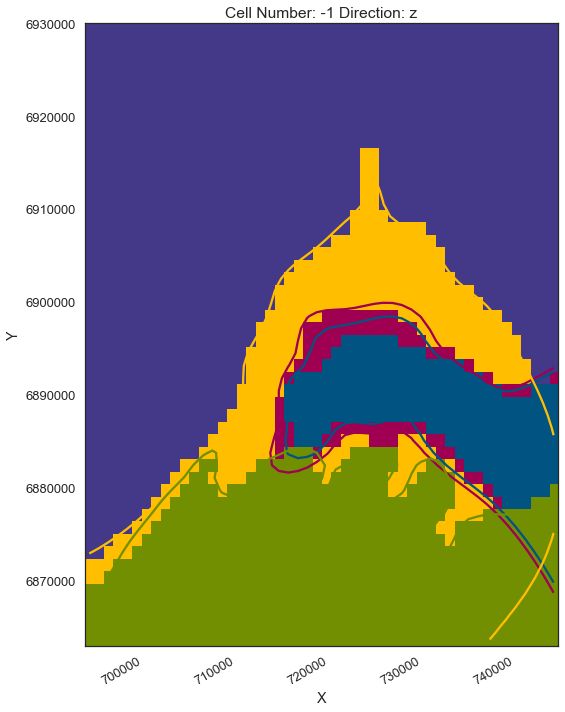

In [103]:
geo_model.solutions.lith_block = lithos[0]
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False)


In [135]:
X_projected_prev.shape

(375012,)

In [136]:
litho = np.ones(X_projected_prev[:dims].shape[0])*5
for j in range(litho.shape[0]):
    if X_projected_prev[:dims][j] >= X_projected_prev[3*dims:3*dims+1]:
        litho[j] = 1
    elif (X_projected_prev[dims:2*dims][j] < X_projected_prev[3*dims+5:3*dims+6]) & (X_projected_prev[dims:2*dims][j] >= X_projected_prev[3*dims+6:3*dims+7]):
        litho[j] = 3
    elif X_projected_prev[dims:2*dims][j] >= X_projected_prev[3*dims+5:3*dims+6]:
        litho[j] = 2
    elif X_projected_prev[2*dims:3*dims][j] >= X_projected_prev[3*dims+11:]:
        litho[j] = 4

In [133]:
litho = np.ones(scalar_fields1[0,:].shape[0])*5 #basement
for j in range(litho.shape[0]): #start from the bottom
    if scalar_fields1[0,:][j] >= boundaries1[0,:][0]:
        litho[j] = 1
    elif (scalar_fields2[0, :][j] < boundaries2[0,:][1]) & (scalar_fields2[0, :][j] >= boundaries2[0,:][2]):
        litho[j] = 3
    elif scalar_fields2[0, :][j] >= boundaries2[0,:][1]:
        litho[j] = 2
    elif scalar_fields3[0, :][j] >= boundaries3[0,:][3]:
        litho[j] = 4
    

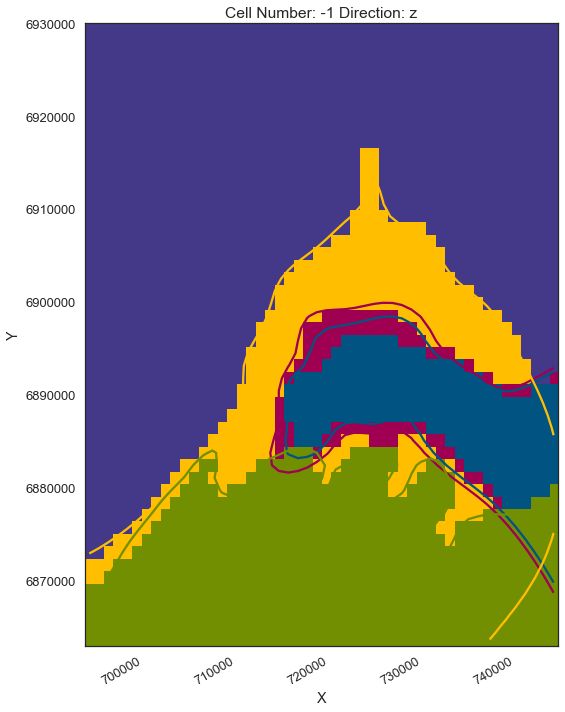

In [137]:
geo_model.solutions.lith_block = litho
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False)

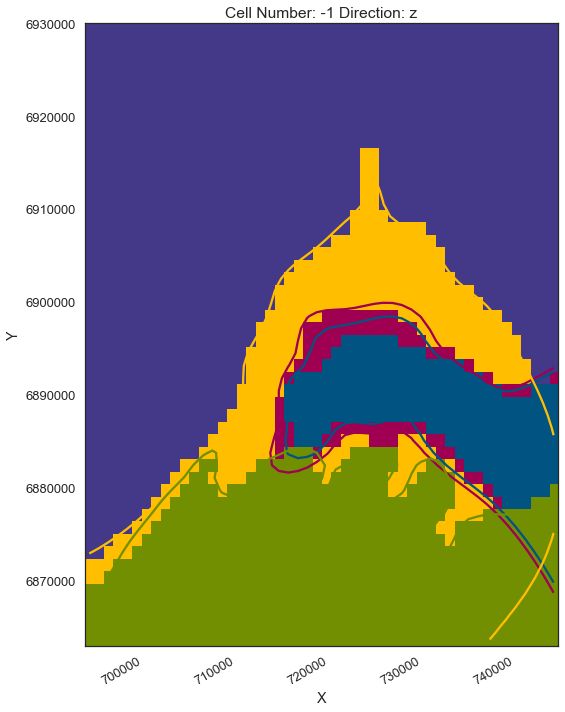

In [115]:
geo_model.solutions.lith_block = lithos[0]
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False)


In [581]:
boundaries1[0,:]

array([0.16315592, 0.        , 0.        , 0.        ])

In [112]:
boundaries2[0,:]

array([0.        , 0.68980333, 0.68455168, 0.        ])

In [122]:
boundaries3[0,:]

array([0.        , 0.        , 0.        , 0.64999694])

In [123]:
boundaries1[0,:]

array([0.16315592, 0.        , 0.        , 0.        ])

In [575]:
## loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [576]:
loadings

array([[-1.18046081e-01,  9.44696056e-04, -1.35867766e-03, ...,
         1.17875206e-06,  5.10504249e-07, -6.79901053e-15],
       [-1.18563170e-01,  9.10256519e-04, -1.35645162e-03, ...,
         1.18679078e-06,  4.93281703e-07, -2.02970484e-15],
       [-1.19078775e-01,  8.75095752e-04, -1.35461081e-03, ...,
         1.19400335e-06,  4.75045275e-07,  7.94553549e-16],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.08037241e-03,  1.44293519e-02, -1.02440142e-01, ...,
        -1.70933302e-05,  3.88763463e-06,  1.67934650e-19]])

In [577]:
loadings.shape

(375012, 300)

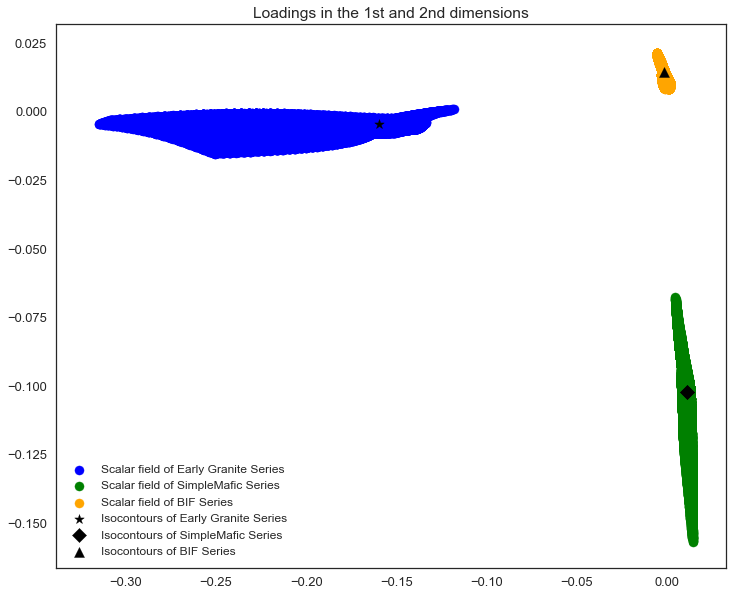

In [595]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
sca1 = plt.scatter(loadings[:125000, 0], loadings[:125000, 1], c = 'blue')
sca2 = plt.scatter(loadings[125000:250000, 0], loadings[125000:250000, 1], c = 'green')
sca3 = plt.scatter(loadings[250000:375000, 0], loadings[250000:375000, 1], c = 'orange')
sca4 = plt.scatter(loadings[375000, 0], loadings[375000, 1], c = 'black', marker = '*', s = 100)
sca5 = plt.scatter(loadings[375005:375007, 0], loadings[375005:375007, 1], c = 'black', marker = 'D', s = 100)
sca6 = plt.scatter(loadings[375011, 0], loadings[375011, 1], c = 'black', marker = '^', s = 100)
plt.legend((sca1, sca2, sca3, sca4, sca5, sca6),
           ('Scalar field of Early Granite Series', 'Scalar field of SimpleMafic Series',
            'Scalar field of BIF Series', 'Isocontours of Early Granite Series', 'Isocontours of SimpleMafic Series',
            'Isocontours of BIF Series'),
           loc='lower left',
           fontsize=12)
plt.title('Loadings in the 1st and 2nd dimensions')
plt.show()

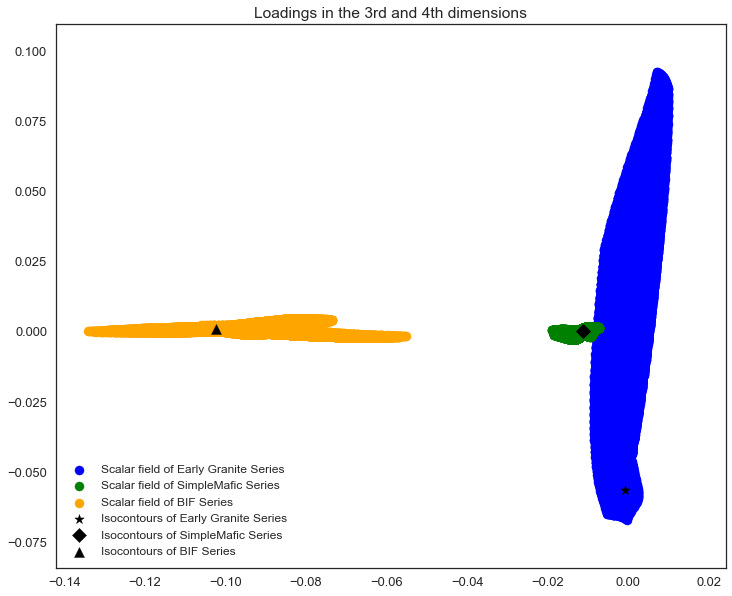

In [596]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
sca1 = plt.scatter(loadings[:125000, 2], loadings[:125000, 3], c = 'blue')
sca2 = plt.scatter(loadings[125000:250000, 2], loadings[125000:250000, 3], c = 'green')
sca3 = plt.scatter(loadings[250000:375000, 2], loadings[250000:375000, 3], c = 'orange')
sca4 = plt.scatter(loadings[375000, 2], loadings[375000, 3], c = 'black', marker = '*', s = 100)
sca5 = plt.scatter(loadings[375005:375007, 2], loadings[375005:375007, 3], c = 'black', marker = 'D', s = 100)
sca6 = plt.scatter(loadings[375011, 2], loadings[375011, 3], c = 'black', marker = '^', s = 100)
plt.legend((sca1, sca2, sca3, sca4, sca5, sca6),
           ('Scalar field of Early Granite Series', 'Scalar field of SimpleMafic Series',
            'Scalar field of BIF Series', 'Isocontours of Early Granite Series', 'Isocontours of SimpleMafic Series',
            'Isocontours of BIF Series'),
           loc='lower left',
           fontsize=12)
plt.title('Loadings in the 3rd and 4th dimensions')
plt.show()

In [579]:
loading_matrix

PC1       PC2
0      -0.118046  0.000945
1      -0.118563  0.000910
2      -0.119079  0.000875
3      -0.119593  0.000839
4      -0.120105  0.000803
...          ...       ...
375007  0.000000  0.000000
375008  0.000000  0.000000
375009  0.000000  0.000000
375010  0.000000  0.000000
375011 -0.002080  0.014429

[375012 rows x 2 columns]

## MH on priors

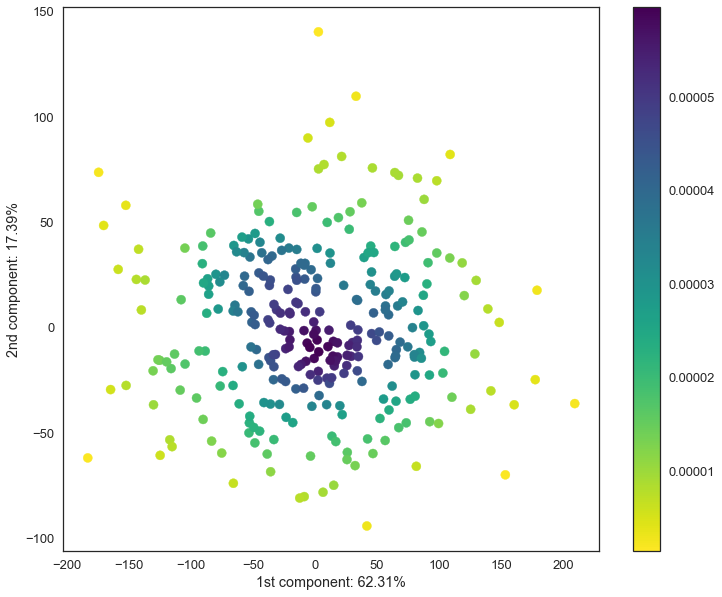

In [85]:
x = D_scores[:, 0]
y = D_scores[:, 1]
values = np.vstack([x, y])

kde = stats.gaussian_kde(values)
density = kde(values)

plt.scatter(x, y,  c=density, cmap = 'viridis_r')
plt.xlabel("1st component: " + str(round(pca.explained_variance_ratio_[0]*100,2)) + "%")
plt.ylabel("2nd component: " + str(round(pca.explained_variance_ratio_[1]*100,2)) + "%")
plt.colorbar()
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

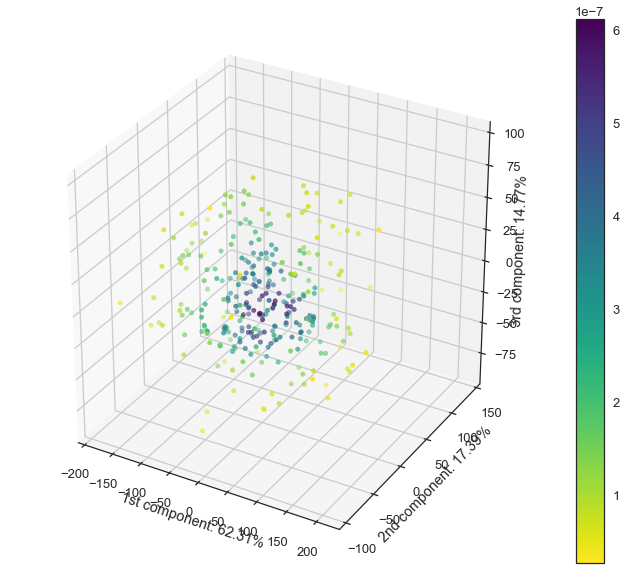

In [87]:
x = D_scores[:, 0]
y = D_scores[:, 1]
z = D_scores[:, 2]
values = np.vstack([x, y, z])

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
p = ax.scatter(x, y, z, c=density, cmap = 'viridis_r')
ax.set_xlabel("1st component: " + str(round(pca.explained_variance_ratio_[0]*100,2)) + "%")
ax.set_ylabel("2nd component: " + str(round(pca.explained_variance_ratio_[1]*100,2)) + "%")
ax.set_zlabel("3rd component: " + str(round(pca.explained_variance_ratio_[2]*100,2)) + "%")
fig.colorbar(p)
plt.show()

In [190]:
locs = np.mean(D_scores, axis = 0)
scales = np.std(D_scores, axis = 0)

In [141]:
scales[0]

70.18442604449608

In [191]:
def MetropolisHastingsND(n, m, keep_m):
    
    x = D_scores[:, 0]
    y = D_scores[:, 1]
    z = D_scores[:, 2]
    values = np.vstack([x, y, z])
    kernel3d = stats.gaussian_kde(values) #initialize KDE by estimating the prior pdf
    
    mat = np.zeros((n, 3))
    score_mat = np.zeros((n, m))
    x = 200
    y = 200
    z = 100
    prev_dims = np.zeros((1, m))
    scores_recon = np.zeros((1,m))
    
    prev = kernel3d.evaluate(np.array((x,y,z)))
    mat[0,:] = np.zeros((1, 3))
    
    prev_1d = np.zeros((1, m))
    locs = np.mean(D_scores, axis = 0)
    scales = np.std(D_scores, axis = 0)
    
    prev_dims[0, :] = [stats.norm.rvs( locs[j], scales[j], 1) for j in range(m)]
    prev_1d[0, :] = [stats.norm.pdf(prev_dims[0,j], locs[j], scales[j]) for j in range(m)]
    scores_recon[0, :] = [prev_dims[0, j] for j in range(m)]
    
    # the first three dimensions
    scores_recon[0,0] = x
    scores_recon[0,1] = y
    scores_recon[0,2] = z
    
    scores_recon[0,m-2] = random.choices(D_scores[:,m-2], k=1)[0]
    scores_recon[0,m-1] = random.choices(D_scores[:,m-1], k=1)[0]
    
    counter = 0
    total_counter = 0
    ratios = []
    accepts = []

    while counter < n:
        total_counter += 1
        
        newx = np.random.normal(x, scales[0]/20.0, 1)
        newy = np.random.normal(y, scales[1]/20.0, 1)
        newz = np.random.normal(z, scales[2]/20.0, 1)
        
        new_dims = np.zeros((1, m))
        scores_recon_new = np.zeros((1,m))
        newprob_1d = np.zeros((1, m))
        
        new_dims[0, :] = [stats.norm.rvs( locs[j], scales[j], 1) for j in range(m)] # random sampling PC scores
        new_dims[0, 0:keep_m] = [np.random.normal(prev_dims[0, j], scales[j]/20.0, 1) for j in range(0, keep_m)] # first several dimensions to do MH
        newprob_1d[0, :] = [stats.norm.pdf(new_dims[0,j], locs[j], scales[j]) for j in range(m)]
        scores_recon_new[0, :] = [new_dims[0, j] for j in range(m)]
        
        scores_recon_new[0,0] = newx
        scores_recon_new[0,1] = newy
        scores_recon_new[0,2] = newz
        
        scores_recon_new[0,m-2] = random.choices(D_scores[:,m-2], k=1)[0]
        scores_recon_new[0,m-1] = random.choices(D_scores[:,m-1], k=1)[0]
        
        newprob = kernel3d.evaluate(np.array((newx, newy, newz)))
        ratio = newprob/prev
        for j in range(3, keep_m):
            ratio *= newprob_1d[0, j]/prev_1d[0, j] # multiply all ratios
        
        inta = random.random()
        ratios.append(ratio)
        
        if inta <= min(1, ratio):
            x = newx
            y = newy
            z = newz
            mat[counter, :] = np.array((x, y, z)).reshape((1,3))
            score_mat[counter, :] = scores_recon_new
            counter += 1
            prev = newprob
            prev_1d = newprob_1d
            prev_dims = new_dims
            accepts.append(1)
        else:
            accepts.append(0)
            
    return [mat, counter, total_counter, ratios, score_mat, accepts]

In [192]:
iterations = 90000
m = 300
keep_m = 290
[chain_prior, counter_prior, total_counter_prior, ratios_prior, score_mat_prior, accepts_prior] = MetropolisHastingsND(iterations, m, keep_m)

In [193]:
iterations/len(accepts_prior)

0.6710158434296365

In [194]:
#indices = [i for i in range(iterations) if i%300 == 0]
indices = [i for i in range(iterations) if i%300 == 0]

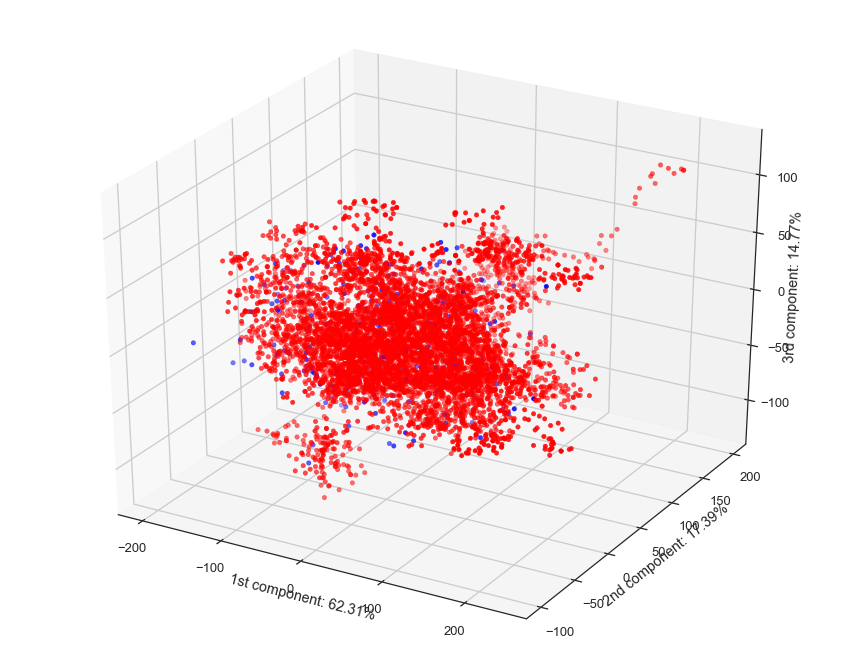

In [291]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
sca1 = ax.scatter(D_scores[:,0], D_scores[:,1], D_scores[:,2], c = 'blue')
sca2 = ax.scatter(chain_prior[indices[:], 0], chain_prior[indices[:], 1], chain_prior[indices[:], 2], c = 'red')
indices_chain = [i for i in range(iterations) if i%10 == 0]
sca3 = ax.scatter(chain_prior[indices_chain[:], 0], chain_prior[indices_chain[:], 1], chain_prior[indices_chain[:], 2], c = 'red')
#ax.plot(chain_prior[indices, 0], chain_prior[indices, 1],chain_prior[indices, 2], c = 'red')
ax.set_xlabel("1st component: " + str(round(pca.explained_variance_ratio_[0]*100,2)) + "%")
ax.set_ylabel("2nd component: " + str(round(pca.explained_variance_ratio_[1]*100,2)) + "%")
ax.set_zlabel("3rd component: " + str(round(pca.explained_variance_ratio_[2]*100,2)) + "%")
plt.show()

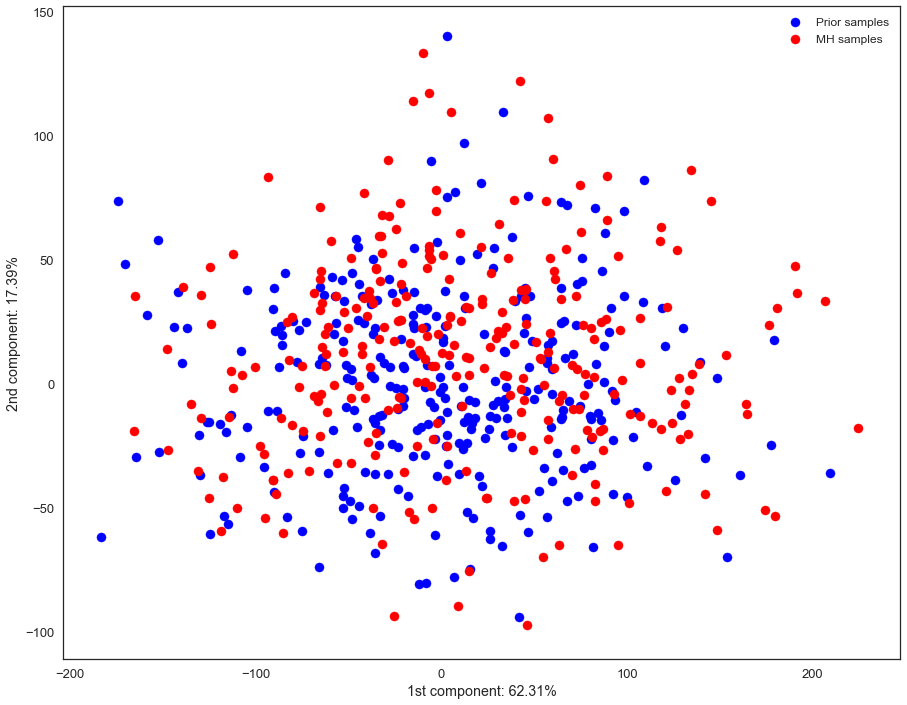

In [196]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
sca1 = plt.scatter(D_scores[:, 0], D_scores[:, 1], c = 'blue')
sca2 = plt.scatter(chain_prior[indices[15:], 0], chain_prior[indices[15:], 1], c = 'red')
plt.xlabel("1st component: " + str(round(pca.explained_variance_ratio_[0]*100,2)) + "%")
plt.ylabel("2nd component: " + str(round(pca.explained_variance_ratio_[1]*100,2)) + "%")
plt.legend((sca1, sca2),
           ('Prior samples', 'MH samples'),
           loc='upper right',
           fontsize=12)
plt.show()

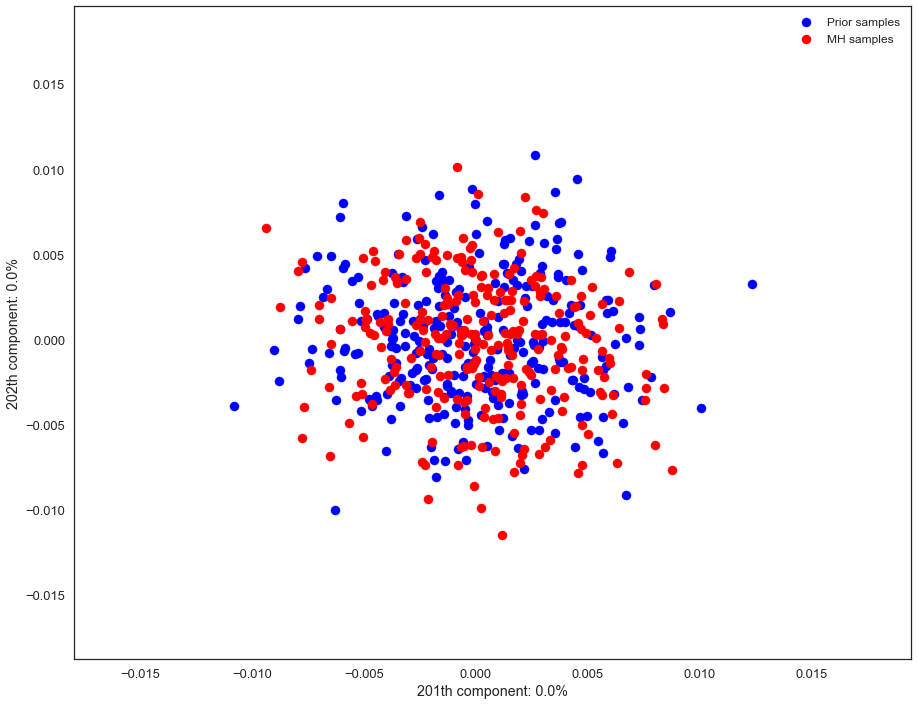

In [202]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
sca1 = plt.scatter(D_scores[:, 200], D_scores[:, 201], c = 'blue')
sca2 = plt.scatter(score_mat_prior[indices[25:], 200], score_mat_prior[indices[25:], 201], c = 'red')
plt.xlabel("201th component: " + str(round(pca.explained_variance_ratio_[200]*100,2)) + "%")
plt.ylabel("202th component: " + str(round(pca.explained_variance_ratio_[201]*100,2)) + "%")
plt.legend((sca1, sca2),
           ('Prior samples', 'MH samples'),
           loc='upper right',
           fontsize=12)
plt.show()

In [198]:
##-------Don't accidentally run this and waste time!
closest_indices, distances = pairwise_distances_argmin_min(geo_model.grid.centered_grid.values, geo_model.grid.regular_grid.values)


In [199]:
distance = 9999999999
index_keep = 0
prior_gravities = np.zeros((len(indices), grav_true.shape[0]))
dims= 125000
for i in range(len(indices)):
    
    X_projected_new = pca.inverse_transform(score_mat_prior[indices[i],:])
    X_projected_new = X_projected_new + np.mean(M, axis = 0)
    litho = np.ones(X_projected_new[:dims].shape[0])*5
    for j in range(litho.shape[0]):
        if X_projected_new[:dims][j] >= X_projected_new[3*dims:3*dims+1]:
            litho[j] = 1
        elif (X_projected_new[dims:2*dims][j] < X_projected_new[3*dims+5:3*dims+6]) & (X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+6:3*dims+7]):
            litho[j] = 3
        elif X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+5:3*dims+6]:
            litho[j] = 2
        elif X_projected_new[2*dims:3*dims][j] >= X_projected_new[3*dims+11:]:
            litho[j] = 4

    density_block_loop_f = np.zeros(geo_model.grid.centered_grid.values.shape[0])
    for j in range(density_block_loop_f.shape[0]):
        if litho[closest_indices[j]] == 1:
            density_block_loop_f[j] = 2.61
        elif litho[closest_indices[j]] == 2:
            density_block_loop_f[j] = 2.92
        elif litho[closest_indices[j]] == 3:
            density_block_loop_f[j] = 3.1
        elif litho[closest_indices[j]] == 4:
            density_block_loop_f[j] = 2.92
        else:
            density_block_loop_f[j] = 2.61
    densities = density_block_loop_f
    n_devices = int(density_block_loop_f.shape[0] / tz.shape[0])
    tz_rep = np.tile(tz, n_devices)
    # density times the component z of gravity
    grav_new = (densities * tz_rep).reshape((n_devices, -1)).sum(axis=1)
    prior_gravities[i, :] = grav_new


In [200]:
M_data_prior = copy.deepcopy(prior_gravities)
D_utilized_data_prior = M_data_prior - np.mean(M_data, axis = 0)
pca_data_prior = PCA(n_components=min(D_utilized_data_prior.shape[0], D_utilized_data_prior.shape[1]))
pca_data_prior.fit(D_utilized_data)
D_scores_data_prior = pca_data_prior.transform(D_utilized_data_prior)

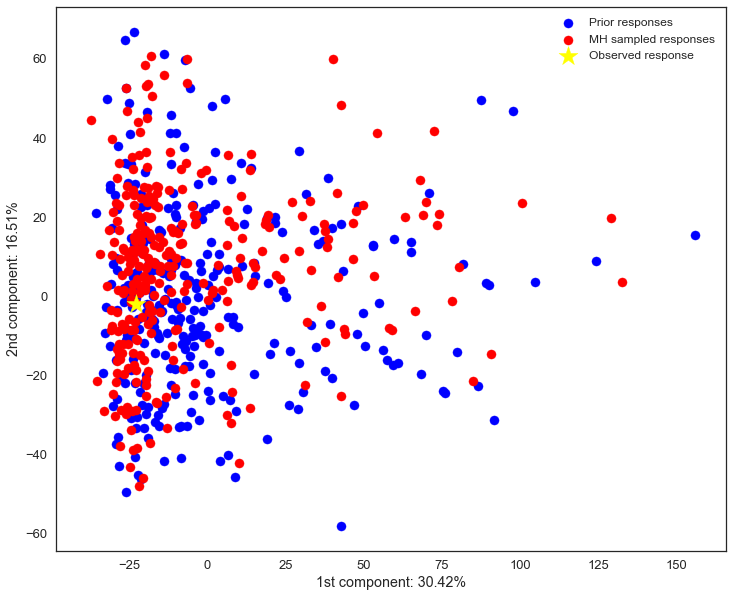

In [201]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
sca1 = plt.scatter(D_scores_data[1:, 0], D_scores_data[1:, 1], c = 'blue')
sca2 = plt.scatter(D_scores_data_prior[:, 0], D_scores_data_prior[:, 1], c = 'red')
sca3 = plt.scatter(D_scores_data[0, 0], D_scores_data[0, 1], c = 'yellow', s = 400, marker = "*")
plt.xlabel("1st component: " + str(round(pca_data_prior.explained_variance_ratio_[0]*100,2)) + "%")
plt.ylabel("2nd component: " + str(round(pca_data_prior.explained_variance_ratio_[1]*100,2)) + "%")
plt.legend((sca1, sca2, sca3),
           ('Prior responses', 'MH sampled responses', 'Observed response'),
           loc='upper right',
           fontsize=12)
plt.show()

Text(0, 0.5, 'PC1 score')

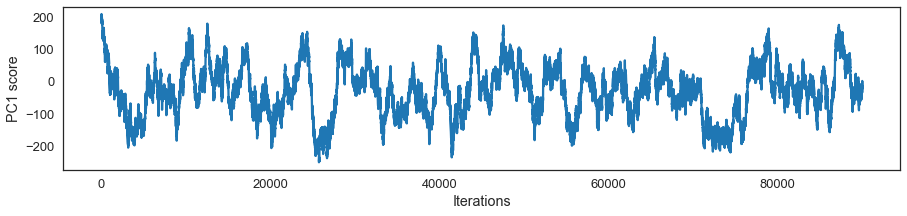

In [91]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
plt.plot(np.array([i for i in range(iterations)]), score_mat_prior[:,0])
plt.xlabel('Iterations')
plt.ylabel('PC1 score')

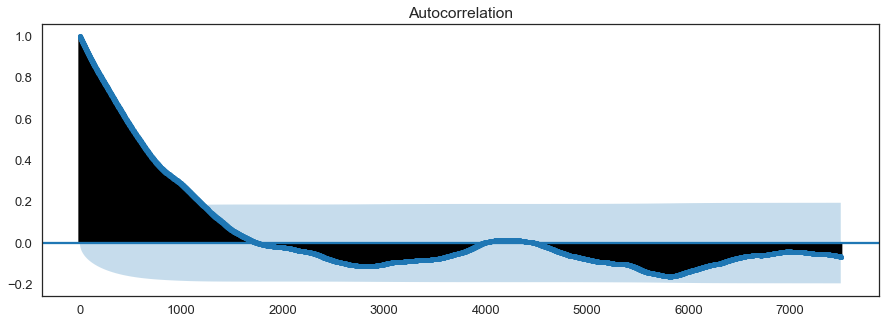

In [92]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
series = pd.DataFrame(score_mat_prior[:,0])
plot_acf(series, lags = 7500)
pyplot.show()

Text(0, 0.5, 'PC2 score')

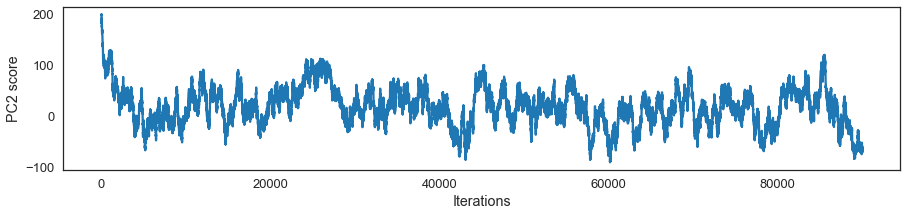

In [93]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
plt.plot(np.array([i for i in range(iterations)]), score_mat_prior[:,1])
plt.xlabel('Iterations')
plt.ylabel('PC2 score')

Text(0, 0.5, 'PC3 score')

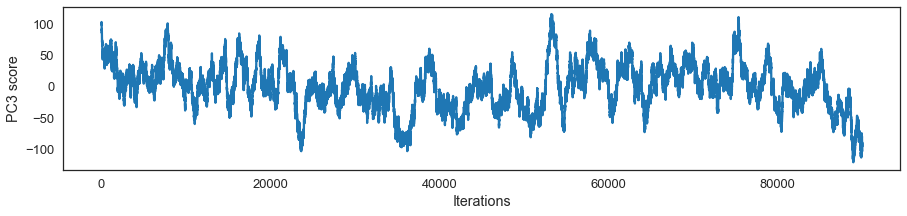

In [94]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
plt.plot(np.array([i for i in range(iterations)]), score_mat_prior[:,2])
plt.xlabel('Iterations')
plt.ylabel('PC3 score')

Text(0, 0.5, 'PC4 score')

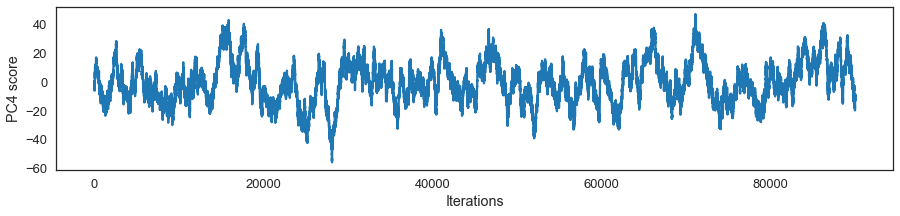

In [95]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
plt.plot(np.array([i for i in range(iterations)]), score_mat_prior[:,3])
plt.xlabel('Iterations')
plt.ylabel('PC4 score')

In [190]:
dims

125000

In [191]:
score_mat.shape

(90000, 300)

In [432]:
# def closest_node(node, nodes):
#     closest_index = distance.cdist([node], nodes).argmin()
#     return closest_index

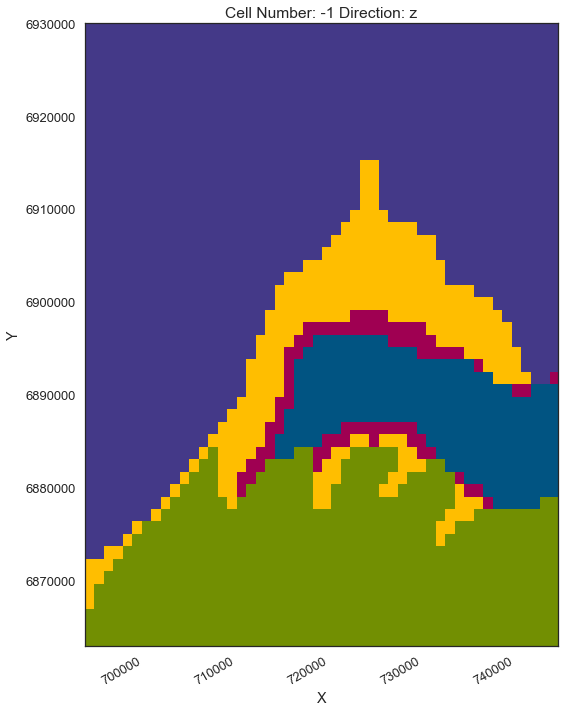

In [101]:
X_projected_prev = pca.inverse_transform(score_mat_prior[indices[10],:])
X_projected_prev = X_projected_prev + np.mean(M, axis = 0)
litho = np.ones(X_projected_prev[:dims].shape[0])*5
for j in range(litho.shape[0]):
    if X_projected_prev[:dims][j] >= X_projected_prev[3*dims:3*dims+1]:
        litho[j] = 1
    elif (X_projected_prev[dims:2*dims][j] < X_projected_prev[3*dims+5:3*dims+6]) & (X_projected_prev[dims:2*dims][j] >= X_projected_prev[3*dims+6:3*dims+7]):
        litho[j] = 3
    elif X_projected_prev[dims:2*dims][j] >= X_projected_prev[3*dims+5:3*dims+6]:
        litho[j] = 2
    elif X_projected_prev[2*dims:3*dims][j] >= X_projected_prev[3*dims+11:]:
        litho[j] = 4
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10

geo_model.solutions.lith_block = litho
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False, show_boundaries = False)


In [102]:
density_block_loop_f = np.zeros(geo_model.grid.centered_grid.values.shape[0])
for j in range(density_block_loop_f.shape[0]):
    if litho[closest_indices[j]] == 1:
        density_block_loop_f[j] = 2.61
    elif litho[closest_indices[j]] == 2:
        density_block_loop_f[j] = 2.92
    elif litho[closest_indices[j]] == 3:
        density_block_loop_f[j] = 3.1
    elif litho[closest_indices[j]] == 4:
        density_block_loop_f[j] = 2.92
    else:
        density_block_loop_f[j] = 2.61
densities = density_block_loop_f
n_devices = int(density_block_loop_f.shape[0] / tz.shape[0])
tz_rep = np.tile(tz, n_devices)
# density times the component z of gravity
grav = (densities * tz_rep).reshape((n_devices, -1)).sum(axis=1)

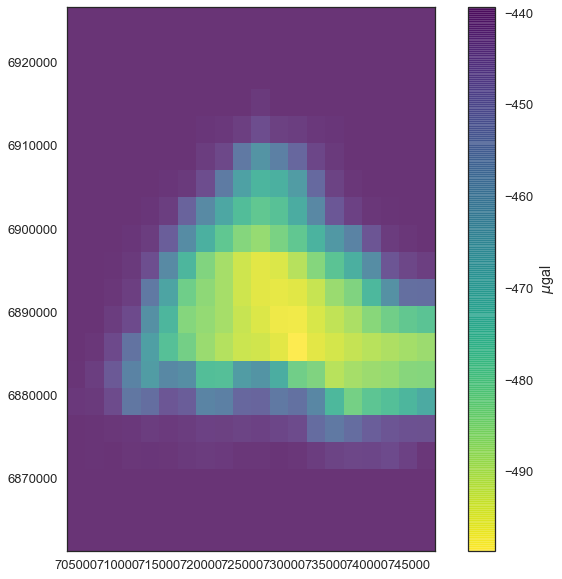

In [103]:
#visualize forward responses
plt.imshow(grav.reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
cbar.set_label(r'$\mu$gal')
plt.show()

In [104]:
# test the mismatch
np.exp(-np.sum((grav - grav_true)**2)/2000.0)

0.34851295276315025

In [105]:
# test the mismatch
np.exp(-np.sum((grav - grav_true)**2)/1000.0)

0.1214612782436898

Text(0.5, 1.0, 'Gravity Profile')

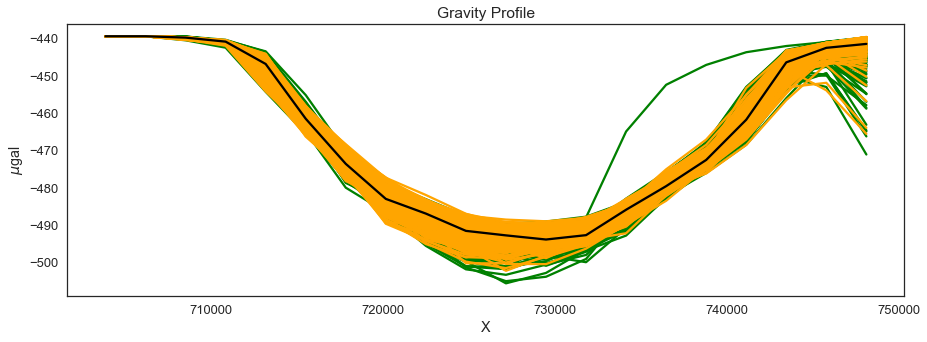

In [211]:
# compare MH grav responses with prior grav responses
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gravities[i].reshape(grav_res, grav_res)[10, :], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             prior_gravities[i].reshape(grav_res, grav_res)[10, :], color='orange')
    
sca3 = plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             grav_true.reshape(grav_res, grav_res)[10, :], color='black')
plt.xlabel('X')
plt.ylabel(r'$\mu$gal')
plt.title('Gravity Profile')


Text(0.5, 1.0, 'Gravity Profile')

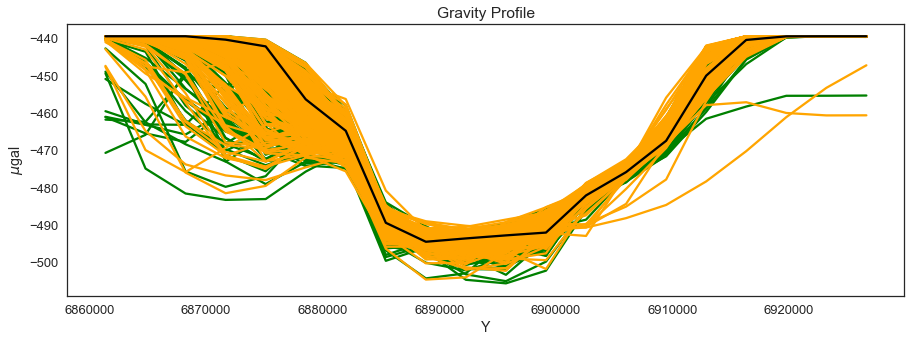

In [213]:
#visualize forward responses profiles

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             fw_gravities[i].reshape(grav_res, grav_res)[:, 10], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             prior_gravities[i].reshape(grav_res, grav_res)[:, 10], color='orange')
plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     num = 20), 
             grav_true.reshape(grav_res, grav_res)[:, 10], color='black')
plt.xlabel('Y')
plt.ylabel(r'$\mu$gal')
plt.title('Gravity Profile')


In [214]:
# compute forward responses' gradients
prior_gradients_x = []
prior_gradients_y = []
for i in range(num_real):
    prior_gradients_x.append(np.gradient(prior_gravities[i].reshape(grav_res, grav_res), axis = 0))
    prior_gradients_y.append(np.gradient(prior_gravities[i].reshape(grav_res, grav_res), axis = 1))

Text(0, 0.5, 'Gradient X')

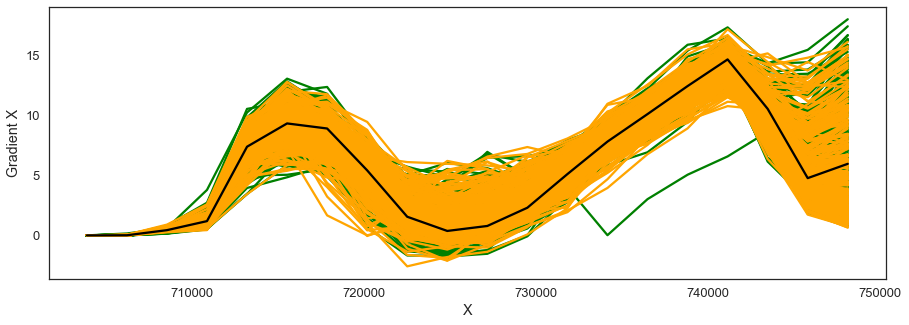

In [215]:
# compare MH grav responses with prior grav responses
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gradients_x[i].reshape(grav_res, grav_res)[10, :], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             prior_gradients_x[i].reshape(grav_res, grav_res)[10, :], color='orange')
    
sca3 = plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             gradx_true.reshape(grav_res, grav_res)[10, :], color='black')
plt.xlabel('X')
plt.ylabel('Gradient X')




Text(0, 0.5, 'Gradient Y')

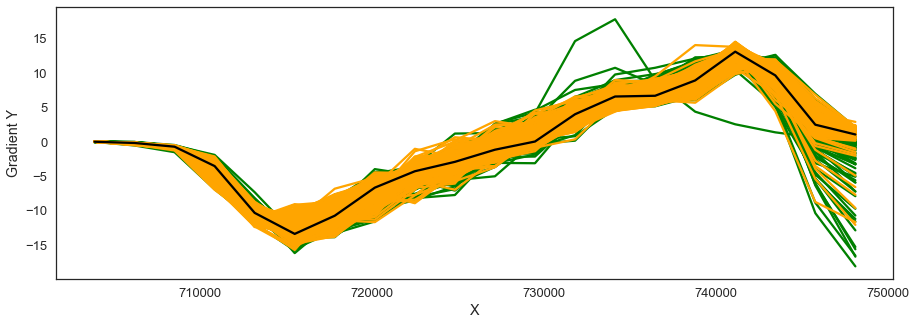

In [218]:
# compare MH grav responses with prior grav responses
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gradients_y[i].reshape(grav_res, grav_res)[10, :], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             prior_gradients_y[i].reshape(grav_res, grav_res)[10, :], color='orange')
    
sca3 = plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             grady_true.reshape(grav_res, grav_res)[10, :], color='black')
plt.xlabel('X')
plt.ylabel('Gradient Y')

Text(0, 0.5, 'Gradient X')

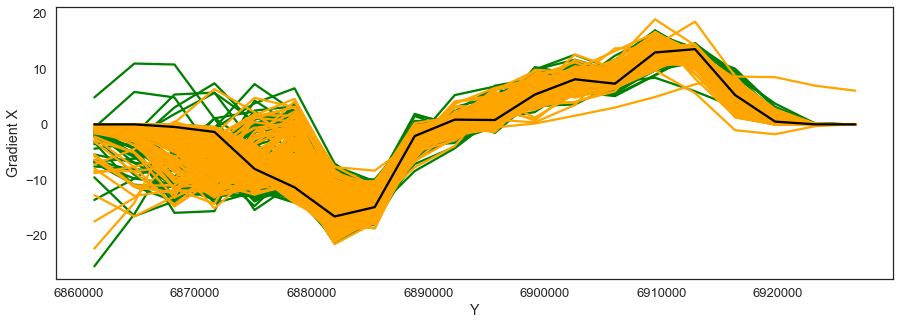

In [216]:
#visualize forward responses profiles

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             fw_gradients_x[i].reshape(grav_res, grav_res)[:, 10], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             prior_gradients_x[i].reshape(grav_res, grav_res)[:, 10], color='orange')
plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     num = 20), 
             gradx_true.reshape(grav_res, grav_res)[:, 10], color='black')
plt.xlabel('Y')
plt.ylabel('Gradient X')


Text(0, 0.5, 'Gradient Y')

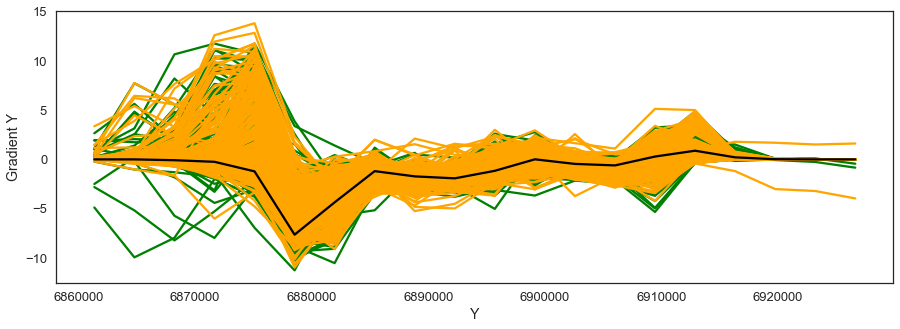

In [217]:
#visualize forward responses profiles

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             fw_gradients_y[i].reshape(grav_res, grav_res)[:, 10], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             prior_gradients_y[i].reshape(grav_res, grav_res)[:, 10], color='orange')
plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     num = 20), 
             grady_true.reshape(grav_res, grav_res)[:, 10], color='black')
plt.xlabel('Y')
plt.ylabel('Gradient Y')

## Posterior sampling

In [108]:
def MetropolisHastingsND_posterior(n, m, keep_m, sigma):
    
    x = D_scores[:, 0]
    y = D_scores[:, 1]
    z = D_scores[:, 2]
    values = np.vstack([x, y, z])
    kernel3d = stats.gaussian_kde(values) #initialize KDE by estimating the prior pdf
    
    mat = np.zeros((n, 3))
    score_mat = np.zeros((n, m))
    x = 200
    y = 150
    z = 100
    prev_dims = np.zeros((1, m))
    scores_recon = np.zeros((1,m))
    
    prev = kernel3d.evaluate(np.array((x,y,z)))
    mat[0,:] = np.zeros((1, 3))
    
    prev_1d = np.zeros((1, m))
    locs = np.mean(D_scores, axis = 0)
    scales = np.std(D_scores, axis = 0)
    
    prev_dims[0, :] = [stats.norm.rvs( locs[j], scales[j], 1) for j in range(m)]
    prev_1d[0, :] = [stats.norm.pdf(prev_dims[0,j], locs[j], scales[j]) for j in range(m)]
    scores_recon[0, :] = [prev_dims[0, j] for j in range(m)]
    
    # the first three dimensions
    scores_recon[0,0] = x
    scores_recon[0,1] = y
    scores_recon[0,2] = z
    
    scores_recon[0,m-2] = random.choices(D_scores[:,m-2], k=1)[0]
    scores_recon[0,m-1] = random.choices(D_scores[:,m-1], k=1)[0]
    
    X_projected_prev = pca.inverse_transform(scores_recon[0,:])
    X_projected_prev = X_projected_prev + np.mean(M, axis = 0)
    litho = np.ones(X_projected_prev[:dims].shape[0])*5
    for j in range(litho.shape[0]):
        if X_projected_prev[:dims][j] >= X_projected_prev[3*dims:3*dims+1]:
            litho[j] = 1
        elif (X_projected_prev[dims:2*dims][j] < X_projected_prev[3*dims+5:3*dims+6]) & (X_projected_prev[dims:2*dims][j] >= X_projected_prev[3*dims+6:3*dims+7]):
            litho[j] = 3
        elif X_projected_prev[dims:2*dims][j] >= X_projected_prev[3*dims+5:3*dims+6]:
            litho[j] = 2
        elif X_projected_prev[2*dims:3*dims][j] >= X_projected_prev[3*dims+11:]:
            litho[j] = 4
    
    density_block_loop_f = np.zeros(geo_model.grid.centered_grid.values.shape[0])
    for j in range(density_block_loop_f.shape[0]):
        if litho[closest_indices[j]] == 1:
            density_block_loop_f[j] = 2.61
        elif litho[closest_indices[j]] == 2:
            density_block_loop_f[j] = 2.92
        elif litho[closest_indices[j]] == 3:
            density_block_loop_f[j] = 3.1
        elif litho[closest_indices[j]] == 4:
            density_block_loop_f[j] = 2.92
        else:
            density_block_loop_f[j] = 2.61
    densities = density_block_loop_f
    n_devices = int(density_block_loop_f.shape[0] / tz.shape[0])
    tz_rep = np.tile(tz, n_devices)
    # density times the component z of gravity
    grav_prev = (densities * tz_rep).reshape((n_devices, -1)).sum(axis=1)
    
    mismatch_prev = np.sum((grav_prev - grav_true)**2)
    likeprev = np.exp(-np.sum((grav_prev - grav_true)**2)/sigma) #previous likelihood
    
    counter = 0
    total_counter = 0
    ratios = []
    accepts = []
    mismatches = []
    mismatches.append(mismatch_prev)

    while counter < n:
        total_counter += 1
        
        newx = np.random.normal(x, scales[0]/20.0, 1)
        newy = np.random.normal(y, scales[1]/20.0, 1)
        newz = np.random.normal(z, scales[2]/20.0, 1)
        
        new_dims = np.zeros((1, m))
        scores_recon_new = np.zeros((1,m))
        newprob_1d = np.zeros((1, m))
        
        new_dims[0, :] = [stats.norm.rvs( locs[j], scales[j], 1) for j in range(m)] # random sampling PC scores
        new_dims[0, 0:keep_m] = [np.random.normal(prev_dims[0, j], scales[j]/20.0, 1) for j in range(0, keep_m)] # first several dimensions to do MH
        newprob_1d[0, :] = [stats.norm.pdf(new_dims[0,j], locs[j], scales[j]) for j in range(m)]
        scores_recon_new[0, :] = [new_dims[0, j] for j in range(m)]
        
        scores_recon_new[0,0] = newx
        scores_recon_new[0,1] = newy
        scores_recon_new[0,2] = newz
        
        scores_recon_new[0,m-2] = random.choices(D_scores[:,m-2], k=1)[0]
        scores_recon_new[0,m-1] = random.choices(D_scores[:,m-1], k=1)[0]
        
        X_projected_new = pca.inverse_transform(scores_recon_new[0,:])
        X_projected_new = X_projected_new + np.mean(M, axis = 0)
        litho = np.ones(X_projected_new[:dims].shape[0])*5
        for j in range(litho.shape[0]):
            if X_projected_new[:dims][j] >= X_projected_new[3*dims:3*dims+1]:
                litho[j] = 1
            elif (X_projected_new[dims:2*dims][j] < X_projected_new[3*dims+5:3*dims+6]) & (X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+6:3*dims+7]):
                litho[j] = 3
            elif X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+5:3*dims+6]:
                litho[j] = 2
            elif X_projected_new[2*dims:3*dims][j] >= X_projected_new[3*dims+11:]:
                litho[j] = 4

        density_block_loop_f = np.zeros(geo_model.grid.centered_grid.values.shape[0])
        for j in range(density_block_loop_f.shape[0]):
            if litho[closest_indices[j]] == 1:
                density_block_loop_f[j] = 2.61
            elif litho[closest_indices[j]] == 2:
                density_block_loop_f[j] = 2.92
            elif litho[closest_indices[j]] == 3:
                density_block_loop_f[j] = 3.1
            elif litho[closest_indices[j]] == 4:
                density_block_loop_f[j] = 2.92
            else:
                density_block_loop_f[j] = 2.61
        densities = density_block_loop_f
        n_devices = int(density_block_loop_f.shape[0] / tz.shape[0])
        tz_rep = np.tile(tz, n_devices)
        # density times the component z of gravity
        grav_new = (densities * tz_rep).reshape((n_devices, -1)).sum(axis=1)
        
        mismatch_new = np.sum((grav_new - grav_true)**2)
        newlike = np.exp(-np.sum((grav_new - grav_true)**2)/sigma) #new likelihood
        
        newprob = kernel3d.evaluate(np.array((newx, newy, newz)))
        ratio = newprob/prev * (newlike/likeprev)
        for j in range(3, keep_m):
            ratio *= newprob_1d[0, j]/prev_1d[0, j] # multiply all ratios
        
        inta = random.random()
        ratios.append(ratio)
        
        if inta <= min(1, ratio):
            x = newx
            y = newy
            z = newz
            mat[counter, :] = np.array((x, y, z)).reshape((1,3))
            score_mat[counter, :] = scores_recon_new
            counter += 1
            prev = newprob
            prev_1d = newprob_1d
            likeprev = newlike
            prev_dims = new_dims
            mismatches.append(mismatch_new)
            accepts.append(1)
        else:
            accepts.append(0)
            
    return [mat, counter, total_counter, ratios, score_mat, accepts, mismatches]

In [109]:
iterations = 60000
m = 300
keep_m = 290
sigma = 1000.0
[chain, counter, total_counter, ratios, score_mat, accepts, mismatches] = MetropolisHastingsND_posterior(iterations, m, keep_m, sigma)

In [110]:
iterations/len(accepts)

0.6673711139536177

In [295]:

indices = [i for i in range(iterations) if i%200 == 0]
#indices = [i for i in range(iterations)]

In [294]:
iterations = 60000

In [112]:
## Find the closest
#mismatches = []
distance = 9999999999
index_keep = 0
posterior_gravities = np.zeros((len(indices), grav_true.shape[0]))
for i in range(len(indices)):
    
    X_projected_new = pca.inverse_transform(score_mat[indices[i],:])
    X_projected_new = X_projected_new + np.mean(M, axis = 0)
    litho = np.ones(X_projected_new[:dims].shape[0])*5
    for j in range(litho.shape[0]):
        if X_projected_new[:dims][j] >= X_projected_new[3*dims:3*dims+1]:
            litho[j] = 1
        elif (X_projected_new[dims:2*dims][j] < X_projected_new[3*dims+5:3*dims+6]) & (X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+6:3*dims+7]):
            litho[j] = 3
        elif X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+5:3*dims+6]:
            litho[j] = 2
        elif X_projected_new[2*dims:3*dims][j] >= X_projected_new[3*dims+11:]:
            litho[j] = 4

    density_block_loop_f = np.zeros(geo_model.grid.centered_grid.values.shape[0])
    for j in range(density_block_loop_f.shape[0]):
        if litho[closest_indices[j]] == 1:
            density_block_loop_f[j] = 2.61
        elif litho[closest_indices[j]] == 2:
            density_block_loop_f[j] = 2.92
        elif litho[closest_indices[j]] == 3:
            density_block_loop_f[j] = 3.1
        elif litho[closest_indices[j]] == 4:
            density_block_loop_f[j] = 2.92
        else:
            density_block_loop_f[j] = 2.61
    densities = density_block_loop_f
    n_devices = int(density_block_loop_f.shape[0] / tz.shape[0])
    tz_rep = np.tile(tz, n_devices)
    # density times the component z of gravity
    grav_new = (densities * tz_rep).reshape((n_devices, -1)).sum(axis=1)
    posterior_gravities[i, :] = grav_new

    distance_temp = np.sum((grav_new - grav_true)**2)
#   mismatches.append(distance_temp)
    if distance_temp < distance:
        distance = distance_temp
        index_keep = i
    

In [113]:
index_keep

297

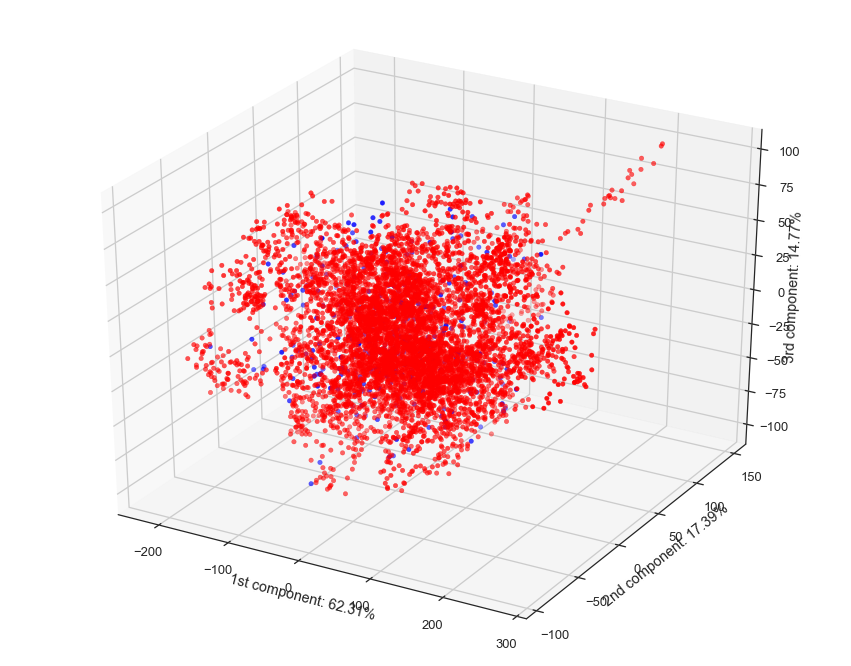

In [292]:
#indices = [i for i in range(iterations)]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
sca1 = ax.scatter(D_scores[:,0], D_scores[:,1], D_scores[:,2], c = 'blue')
indices_chain = [i for i in range(iterations) if i%10 == 0]
sca2 = ax.scatter(chain[indices_chain[:], 0], chain[indices_chain[:], 1], chain[indices_chain[:], 2], c = 'red')
#ax.plot(chain[indices, 0], chain[indices, 1],chain[indices, 2], c = 'red')
ax.set_xlabel("1st component: " + str(round(pca.explained_variance_ratio_[0]*100,2)) + "%")
ax.set_ylabel("2nd component: " + str(round(pca.explained_variance_ratio_[1]*100,2)) + "%")
ax.set_zlabel("3rd component: " + str(round(pca.explained_variance_ratio_[2]*100,2)) + "%")
plt.show()

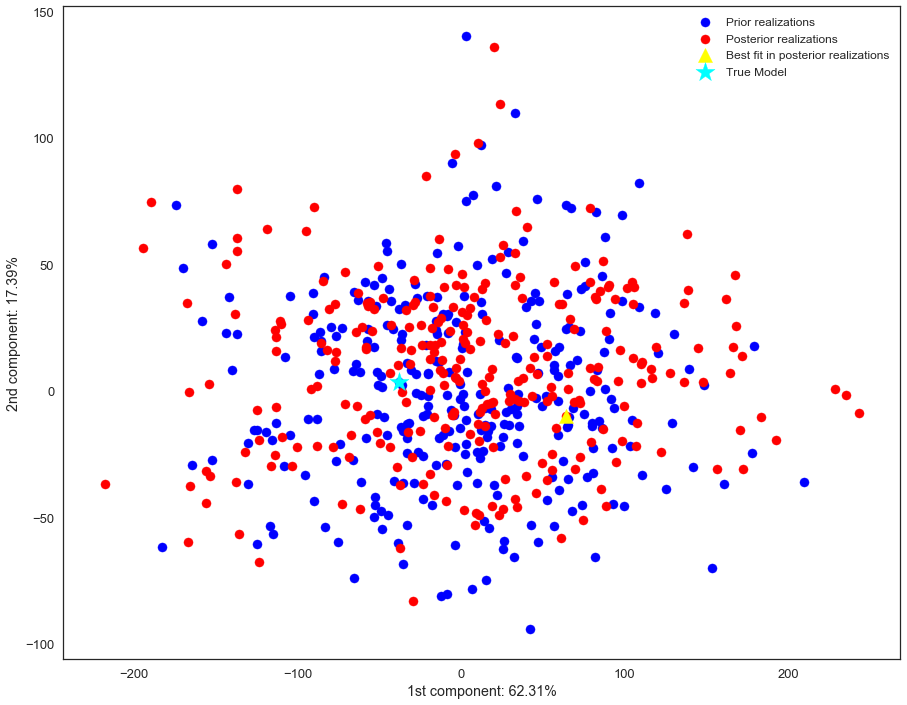

In [115]:
#indices = [i for i in range(iterations)]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
sca1 = plt.scatter(D_scores[:, 0], D_scores[:, 1], c = 'blue')
sca2 = plt.scatter(chain[indices[15:], 0], chain[indices[15:], 1], c = 'red')
sca3 = plt.scatter(chain[indices[index_keep], 0], chain[indices[index_keep], 1], c = 'yellow',s = 200, marker = "^")
sca4 = plt.scatter(D_scores[0, 0], D_scores[0, 1], c = 'Cyan', s = 400, marker = "*")
plt.xlabel("1st component: " + str(round(pca.explained_variance_ratio_[0]*100,2)) + "%")
plt.ylabel("2nd component: " + str(round(pca.explained_variance_ratio_[1]*100,2)) + "%")
plt.legend((sca1, sca2, sca3, sca4),
           ('Prior realizations', 'Posterior realizations', 'Best fit in posterior realizations', 'True Model'),
           loc='upper right',
           fontsize=12)
plt.show()

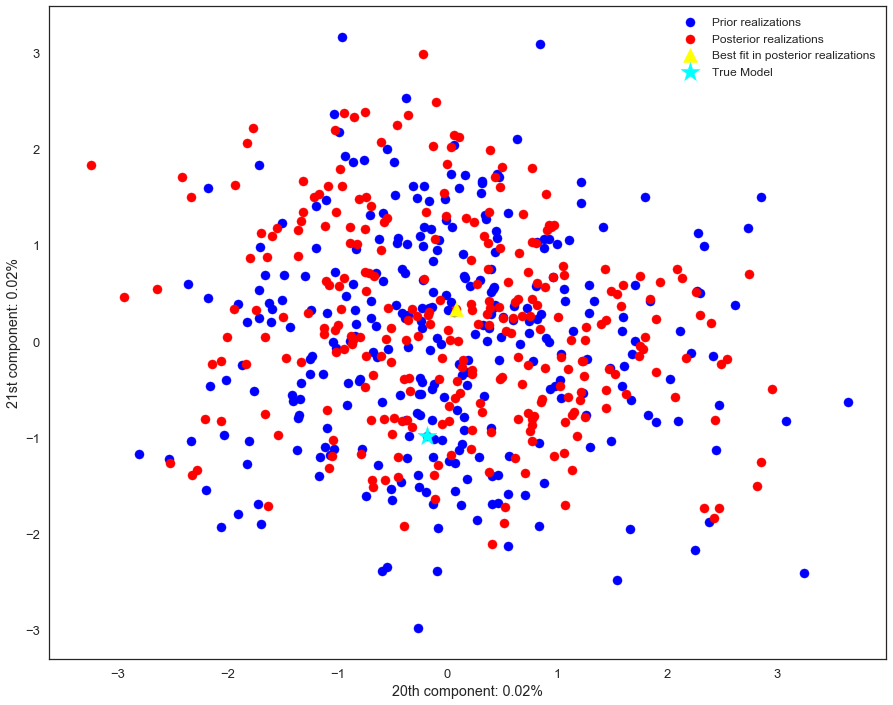

In [123]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
sca1 = plt.scatter(D_scores[:, 20], D_scores[:, 21], c = 'blue')
sca2 = plt.scatter(score_mat[indices[15:], 20], score_mat[indices[15:], 21], c = 'red')
sca3 = plt.scatter(score_mat[indices[index_keep], 20], score_mat[indices[index_keep], 21], c = 'yellow',s = 200, marker = "^")
sca4 = plt.scatter(D_scores[0, 20], D_scores[0, 21], c = 'Cyan', s = 400, marker = "*")
plt.xlabel("20th component: " + str(round(pca.explained_variance_ratio_[19]*100,2)) + "%")
plt.ylabel("21st component: " + str(round(pca.explained_variance_ratio_[20]*100,2)) + "%")
plt.legend((sca1, sca2, sca3, sca4),
           ('Prior realizations', 'Posterior realizations', 'Best fit in posterior realizations', 'True Model'),
           loc='upper right',
           fontsize=12)
plt.show()

In [274]:
X_projected_new = pca.inverse_transform(score_mat[indices[50],:])
X_projected_new = X_projected_new + np.mean(M, axis = 0)
litho = np.ones(X_projected_new[:dims].shape[0])*5
for j in range(litho.shape[0]):
    if X_projected_new[:dims][j] >= X_projected_new[3*dims:3*dims+1]:
        litho[j] = 1
    elif (X_projected_new[dims:2*dims][j] < X_projected_new[3*dims+5:3*dims+6]) & (X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+6:3*dims+7]):
        litho[j] = 3
    elif X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+5:3*dims+6]:
        litho[j] = 2
    elif X_projected_new[2*dims:3*dims][j] >= X_projected_new[3*dims+11:]:
        litho[j] = 4

density_block_loop_f = np.zeros(geo_model.grid.centered_grid.values.shape[0])
for j in range(density_block_loop_f.shape[0]):
    if litho[closest_indices[j]] == 1:
        density_block_loop_f[j] = 2.61
    elif litho[closest_indices[j]] == 2:
        density_block_loop_f[j] = 2.92
    elif litho[closest_indices[j]] == 3:
        density_block_loop_f[j] = 3.1
    elif litho[closest_indices[j]] == 4:
        density_block_loop_f[j] = 2.92
    else:
        density_block_loop_f[j] = 2.61
densities = density_block_loop_f
n_devices = int(density_block_loop_f.shape[0] / tz.shape[0])
tz_rep = np.tile(tz, n_devices)
# density times the component z of gravity
grav_new = (densities * tz_rep).reshape((n_devices, -1)).sum(axis=1)

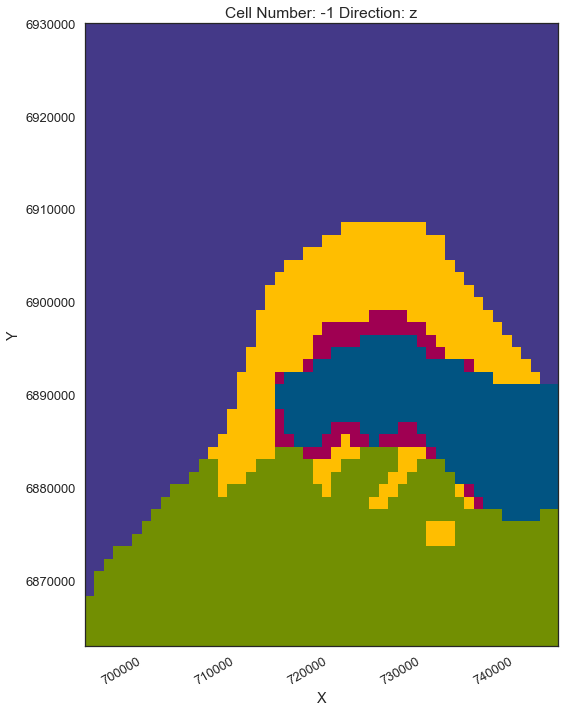

In [275]:
geo_model.solutions.lith_block = litho
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False, show_boundaries = False)

In [177]:
X_projected_new = pca.inverse_transform(score_mat[indices[index_keep],:])
X_projected_new = X_projected_new + np.mean(M, axis = 0)
litho = np.ones(X_projected_new[:dims].shape[0])*5
for j in range(litho.shape[0]):
    if X_projected_new[:dims][j] >= X_projected_new[3*dims:3*dims+1]:
        litho[j] = 1
    elif (X_projected_new[dims:2*dims][j] < X_projected_new[3*dims+5:3*dims+6]) & (X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+6:3*dims+7]):
        litho[j] = 3
    elif X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+5:3*dims+6]:
        litho[j] = 2
    elif X_projected_new[2*dims:3*dims][j] >= X_projected_new[3*dims+11:]:
        litho[j] = 4

density_block_loop_f = np.zeros(geo_model.grid.centered_grid.values.shape[0])
for j in range(density_block_loop_f.shape[0]):
    if litho[closest_indices[j]] == 1:
        density_block_loop_f[j] = 2.61
    elif litho[closest_indices[j]] == 2:
        density_block_loop_f[j] = 2.92
    elif litho[closest_indices[j]] == 3:
        density_block_loop_f[j] = 3.1
    elif litho[closest_indices[j]] == 4:
        density_block_loop_f[j] = 2.92
    else:
        density_block_loop_f[j] = 2.61
densities = density_block_loop_f
n_devices = int(density_block_loop_f.shape[0] / tz.shape[0])
tz_rep = np.tile(tz, n_devices)
# density times the component z of gravity
grav_new = (densities * tz_rep).reshape((n_devices, -1)).sum(axis=1)

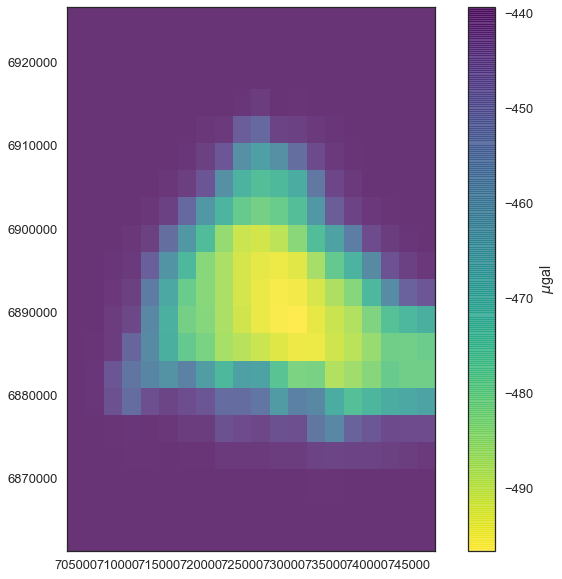

In [178]:
#visualize forward responses
plt.imshow(grav_new.reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
cbar.set_label(r'$\mu$gal')
plt.show()

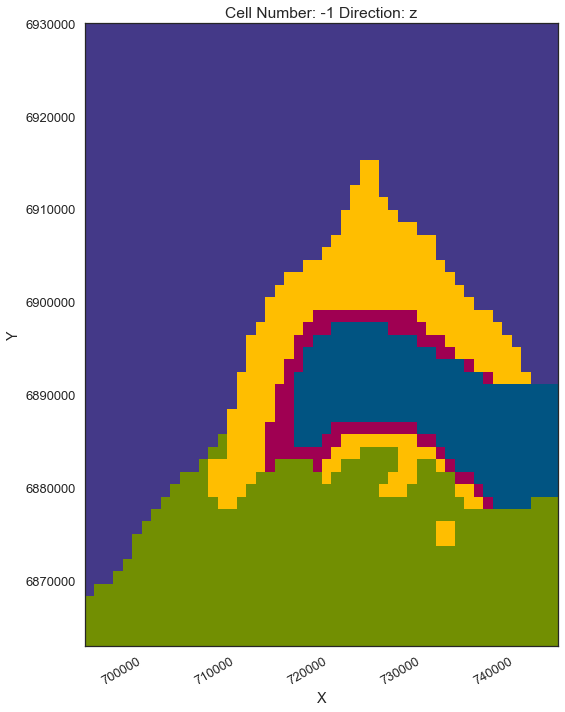

In [179]:
geo_model.solutions.lith_block = litho
gp.plot_2d(geo_model, cell_number=-1, direction='z', show_data = False, show_boundaries = False)

In [180]:
M_data_post = copy.deepcopy(posterior_gravities)
#D_utilized_data_post = scale(M_data_post, with_std = False)
D_utilized_data_post = M_data_post - np.mean(M_data, axis = 0)
pca_data_post = PCA(n_components=min(D_utilized_data_post.shape[0], D_utilized_data_post.shape[1]))
pca_data_post.fit(D_utilized_data)
D_scores_data_post = pca_data_post.transform(D_utilized_data_post)

In [184]:
len(indices)

300

In [182]:
index_keep

297

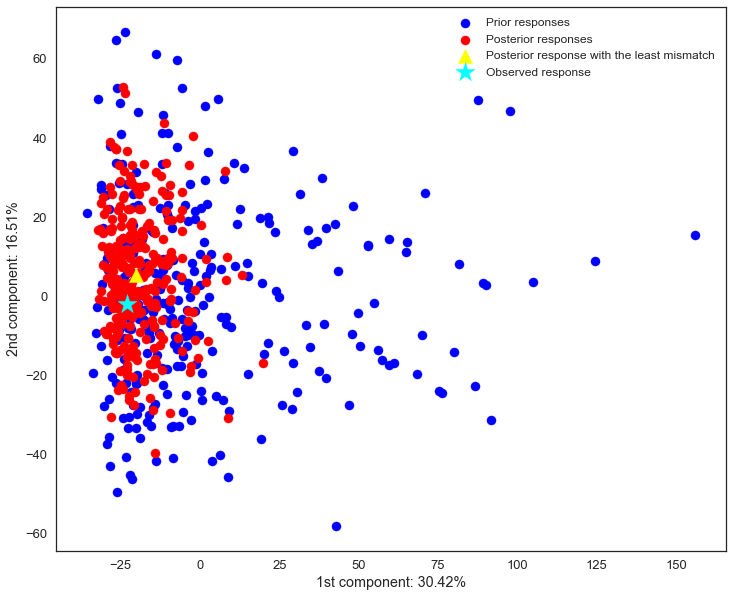

In [186]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
sca1 = plt.scatter(D_scores_data[1:, 0], D_scores_data[1:, 1], c = 'blue')
sca2 = plt.scatter(D_scores_data_post[:, 0], D_scores_data_post[:, 1], c = 'red')
sca3 = plt.scatter(D_scores_data_post[index_keep, 0], D_scores_data_post[index_keep, 1], c = 'yellow', s= 200, marker = "^")
sca4 = plt.scatter(D_scores_data[0, 0], D_scores_data[0, 1], c = 'Cyan', s = 400, marker = "*")
plt.xlabel("1st component: " + str(round(pca_data.explained_variance_ratio_[0]*100,2)) + "%")
plt.ylabel("2nd component: " + str(round(pca_data.explained_variance_ratio_[1]*100,2)) + "%")
plt.legend((sca1, sca2, sca3, sca4),
           ('Prior responses', 'Posterior responses', 'Posterior response with the least mismatch', 'Observed response'),
           loc='upper right',
           fontsize=12)
plt.show()

Text(0, 0.5, 'PC1 score')

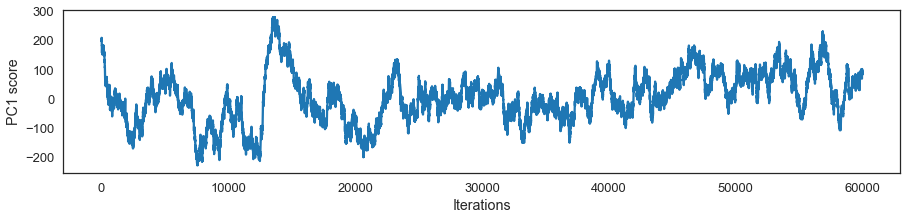

In [124]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
plt.plot(np.array([i for i in range(iterations)]), score_mat[:,0])
plt.xlabel('Iterations')
plt.ylabel('PC1 score')

Text(0, 0.5, 'PC2 score')

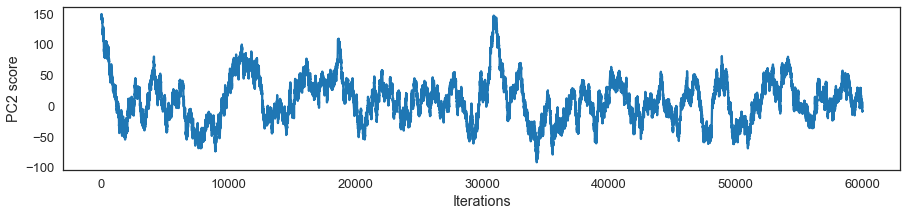

In [125]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
plt.plot(np.array([i for i in range(iterations)]), score_mat[:,1])
plt.xlabel('Iterations')
plt.ylabel('PC2 score')

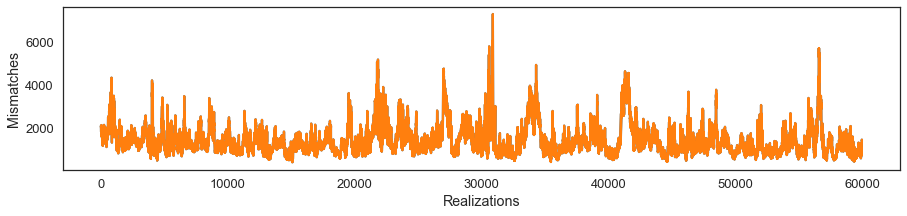

In [126]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
plt.plot(np.array([i for i in range(len(mismatches))]), mismatches)
plt.xlabel('Realizations')
plt.ylabel('Mismatches')
plt.plot(mismatches)

In [528]:
len(mismatches)

3213

Text(0.5, 1.0, 'Gravity Profile')

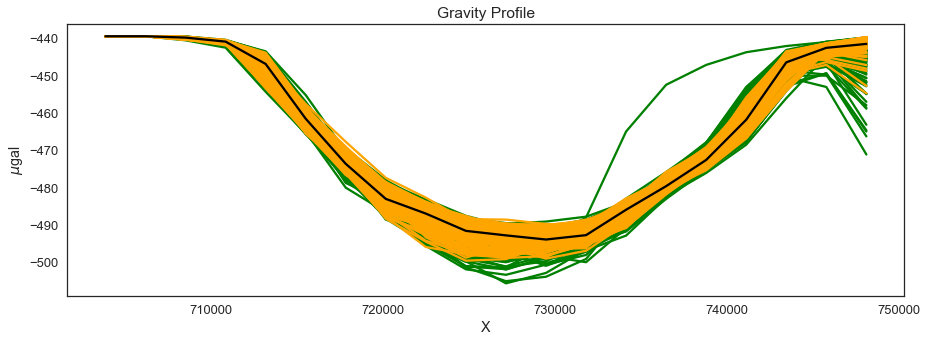

In [219]:
# compare MH grav responses with prior grav responses
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gravities[i].reshape(grav_res, grav_res)[10, :], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             posterior_gravities[i].reshape(grav_res, grav_res)[10, :], color='orange')
    
plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             grav_true.reshape(grav_res, grav_res)[10, :], color='black')
plt.xlabel('X')
plt.ylabel(r'$\mu$gal')
plt.title('Gravity Profile')

Text(0.5, 1.0, 'Gravity Profile')

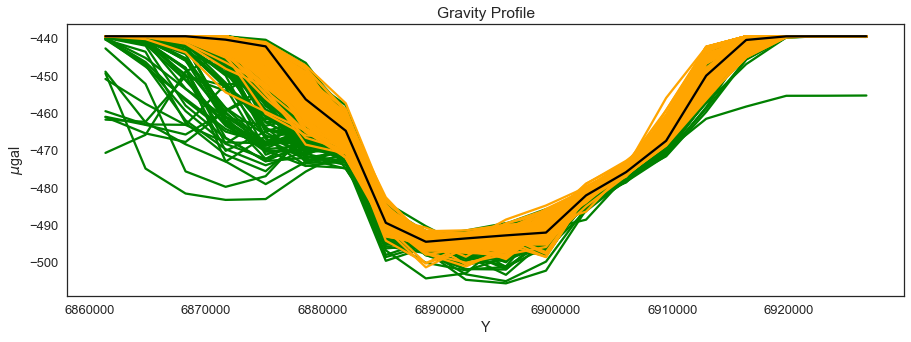

In [220]:
#visualize forward responses profiles

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             fw_gravities[i].reshape(grav_res, grav_res)[:, 10], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             posterior_gravities[i].reshape(grav_res, grav_res)[:, 10], color='orange')
plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     num = 20), 
             grav_true.reshape(grav_res, grav_res)[:, 10], color='black')
plt.xlabel('Y')
plt.ylabel(r'$\mu$gal')
plt.title('Gravity Profile')

In [147]:
# compute forward responses' gradients
posterior_gradients_x = []
posterior_gradients_y = []
for i in range(num_real):
    posterior_gradients_x.append(np.gradient(posterior_gravities[i].reshape(grav_res, grav_res), axis = 0))
    posterior_gradients_y.append(np.gradient(posterior_gravities[i].reshape(grav_res, grav_res), axis = 1))

Text(0, 0.5, 'Gradient X')

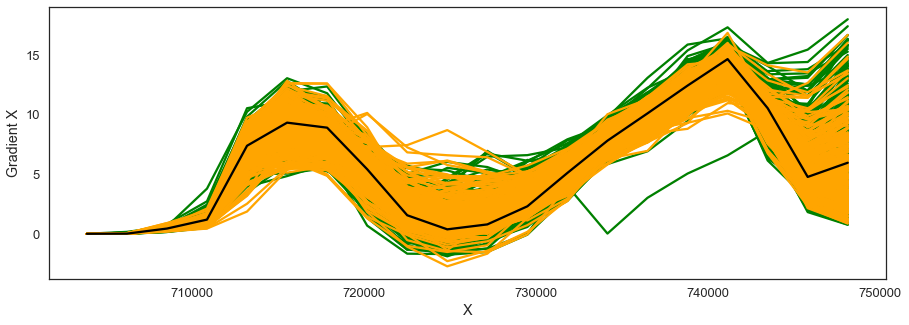

In [221]:
# compare MH grav responses with prior grav responses
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gradients_x[i][10, :], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             posterior_gradients_x[i][10, :], color='orange')
    
plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             gradx_true[10, :], color='black')
plt.xlabel('X')
plt.ylabel('Gradient X')

Text(0, 0.5, 'Gradient Y')

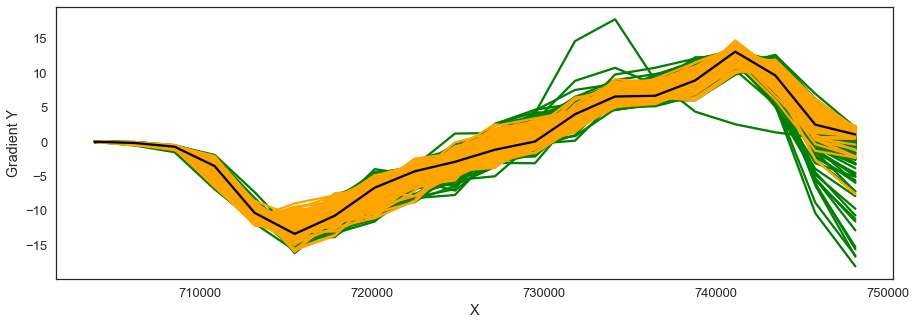

In [222]:
# compare MH grav responses with prior grav responses
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gradients_y[i][10, :], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             posterior_gradients_y[i][10, :], color='orange')
    
plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             grady_true[10, :], color='black')
plt.xlabel('X')
plt.ylabel('Gradient Y')

Text(0, 0.5, 'Gradient Y')

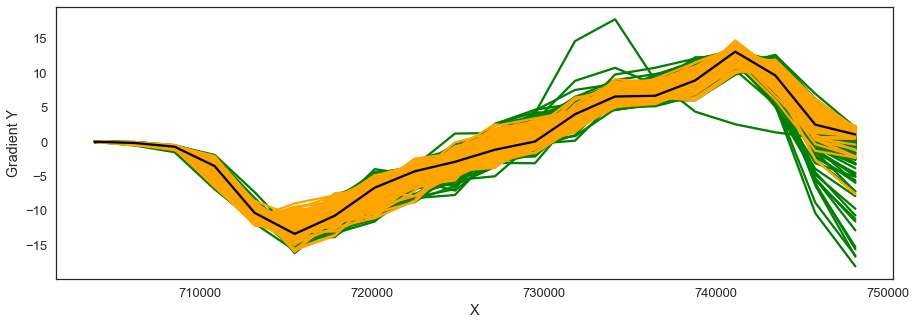

In [224]:
# compare MH grav responses with prior grav responses
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             fw_gradients_y[i][10, :], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             posterior_gradients_y[i][10, :], color='orange')
    
plt.plot(np.linspace(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2, 
                         num = 20), 
             grady_true[10, :], color='black')
plt.xlabel('X')
plt.ylabel('Gradient Y')

Text(0, 0.5, 'Gradient X')

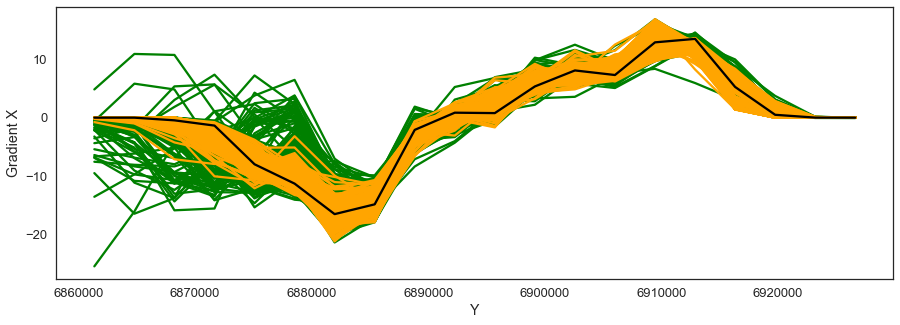

In [225]:
# compare MH grav responses with prior grav responses
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             fw_gradients_x[i][:, 10], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             posterior_gradients_x[i][:, 10], color='orange')
    
plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     num = 20), 
             gradx_true[:, 10], color='black')
plt.xlabel('Y')
plt.ylabel('Gradient X')

Text(0, 0.5, 'Gradient Y')

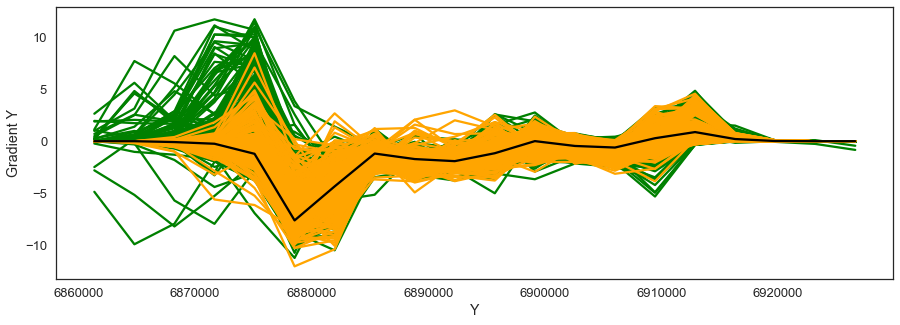

In [226]:
# compare MH grav responses with prior grav responses
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             fw_gradients_y[i][:, 10], color='green')
for i in range(num_real):
    plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                         num = 20), 
             posterior_gradients_y[i][:, 10], color='orange')
    
plt.plot(np.linspace(xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                     num = 20), 
             grady_true[:, 10], color='black')
plt.xlabel('Y')
plt.ylabel('Gradient Y')

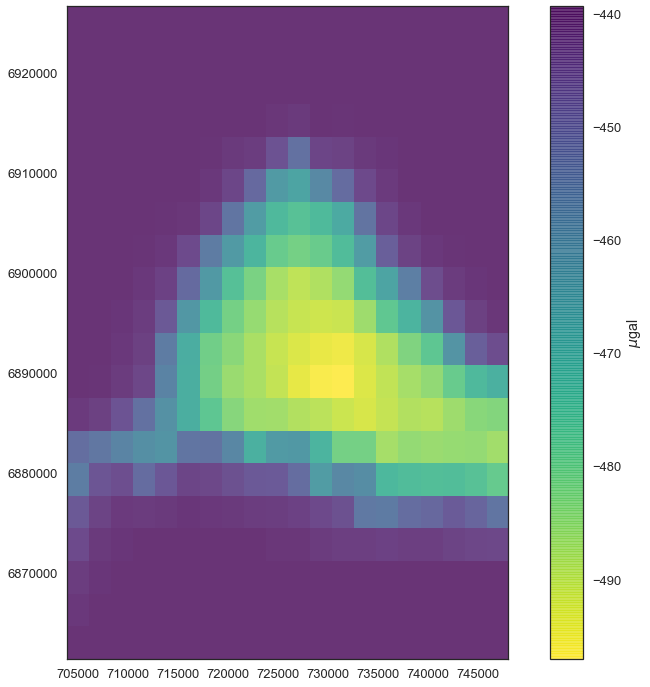

In [128]:
# Visualize forward responses and gradients
#visualize forward responses
plt.imshow(posterior_gravities[0].reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
cbar.set_label(r'$\mu$gal')
plt.show()

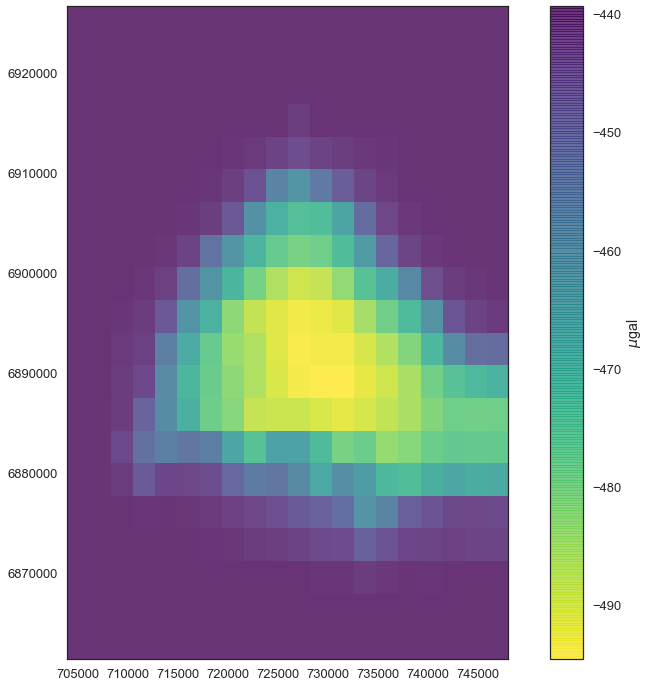

In [136]:
plt.imshow(posterior_gravities[10].reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
cbar.set_label(r'$\mu$gal')
plt.show()

In [131]:
#compute gradient
gradx_posterior0 = np.gradient(posterior_gravities[0].reshape(grav_res, grav_res), axis = 0)
grady_posterior0 = np.gradient(posterior_gravities[0].reshape(grav_res, grav_res), axis = 1)


In [137]:
gradx_posterior1 = np.gradient(posterior_gravities[10].reshape(grav_res, grav_res), axis = 0)
grady_posterior1 = np.gradient(posterior_gravities[10].reshape(grav_res, grav_res), axis = 1)

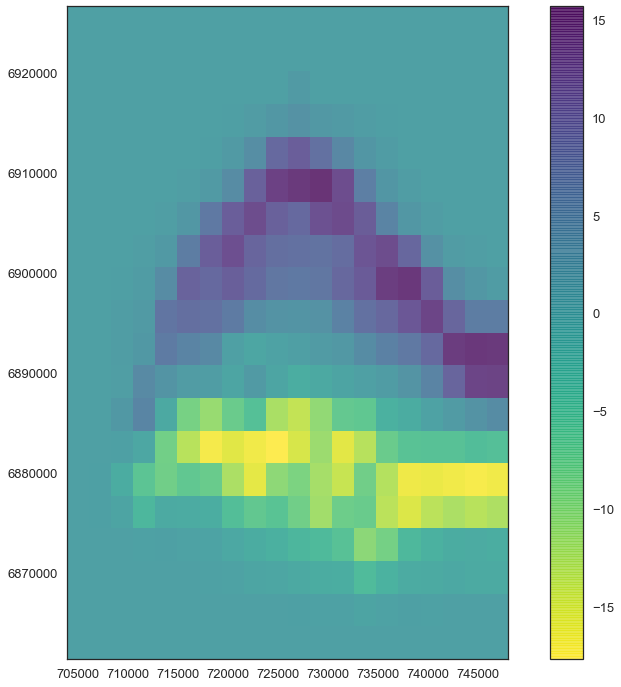

In [139]:
plt.imshow(gradx_posterior1,
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
#cbar.set_label(r'$\mu$gal')
plt.show()

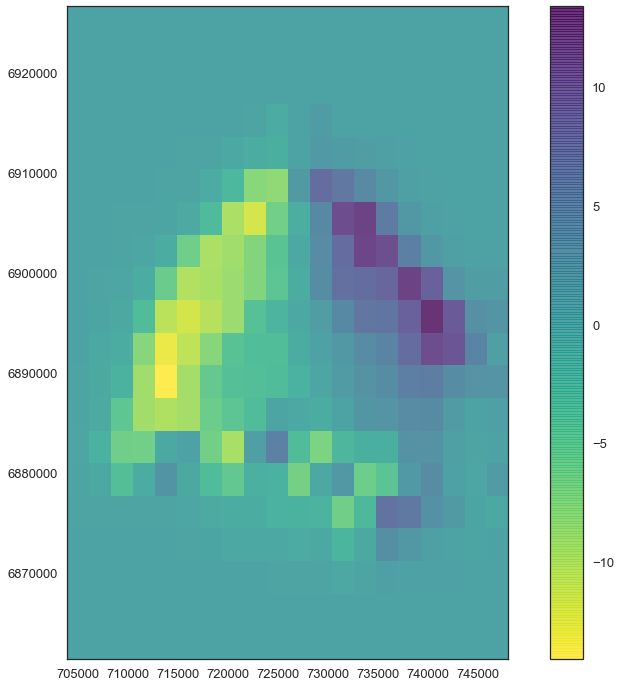

In [140]:
plt.imshow(grady_posterior1,
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
#cbar.set_label(r'$\mu$gal')
plt.show()

## Mismatch distribution

In [238]:
# Post
mismatches_post = np.asarray(mismatches)

In [254]:
#Prior
mismatches_prior = []
for i in range(300):
    mismatches_prior.append(np.sum((fw_gravities[i] - grav_true)**2))

In [256]:
mismatches_prior = np.asarray(mismatches_prior)

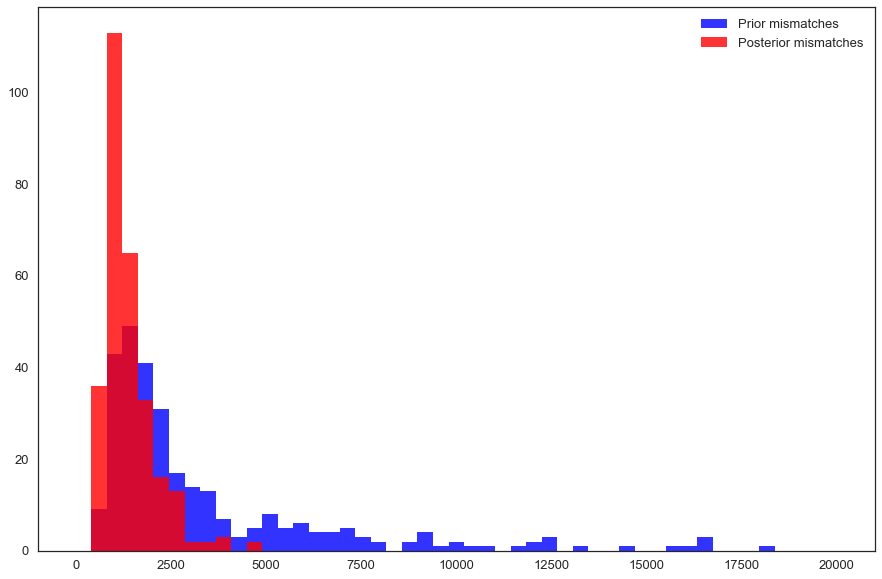

In [269]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

bins = np.linspace(0, 20000, 50)

plt.hist(mismatches_prior, bins, color = 'blue',alpha = 0.8, label='Prior mismatches')
plt.hist(mismatches_post[indices[15:]], bins, color = 'red',alpha=0.8, label='Posterior mismatches')
pyplot.legend(loc='upper right')
pyplot.show()

In [279]:
np.mean(mismatches_prior)

3857.8072636695324

In [281]:
np.mean(mismatches_post)

1403.4124521882882

## Uncertainty

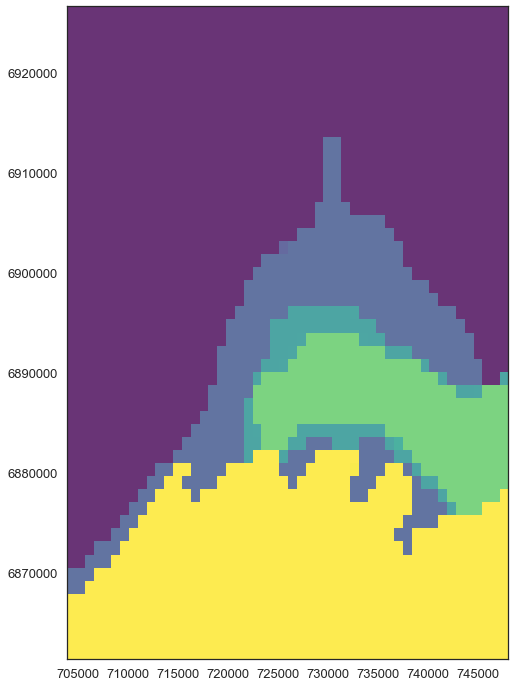

In [298]:
#visualize lithology
plt.imshow(lithos[0].reshape((50, 50, 50))[:,:,-1].T,
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
#cbar = plt.colorbar()
#cbar.set_label(r'$\mu$gal')
plt.show()

In [301]:
probability_simpleMafic = np.zeros((1, dims))
for i in range(num_real):
    for j in range(dims):
        probability_simpleMafic[0, j] += 1 if lithos[i, j] == 4 else 0
probability_simpleMafic[0, :] /= num_real



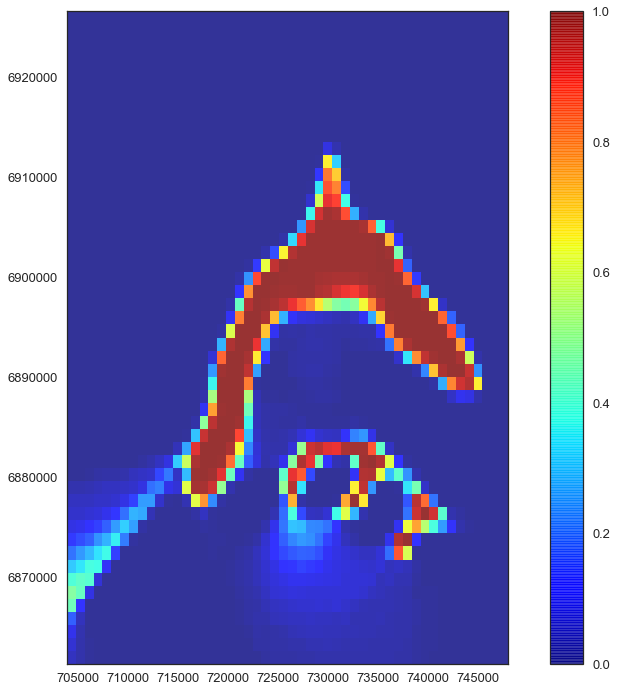

In [303]:
plt.imshow(probability_simpleMafic[0, :].reshape((50, 50, 50))[:,:,-1].T,
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='jet', origin='lower', alpha=.8)
plt.colorbar()

plt.show()

In [306]:
len(indices)

300

In [308]:
lithos_post = np.zeros((num_real, dims))
for i in range(len(indices)):
    X_projected_new = pca.inverse_transform(score_mat[indices[i],:])
    X_projected_new = X_projected_new + np.mean(M, axis = 0)
    litho = np.ones(X_projected_new[:dims].shape[0])*5
    for j in range(litho.shape[0]):
        if X_projected_new[:dims][j] >= X_projected_new[3*dims:3*dims+1]:
            litho[j] = 1
        elif (X_projected_new[dims:2*dims][j] < X_projected_new[3*dims+5:3*dims+6]) & (X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+6:3*dims+7]):
            litho[j] = 3
        elif X_projected_new[dims:2*dims][j] >= X_projected_new[3*dims+5:3*dims+6]:
            litho[j] = 2
        elif X_projected_new[2*dims:3*dims][j] >= X_projected_new[3*dims+11:]:
            litho[j] = 4
    lithos_post[i, :] = litho

In [309]:
probability_simpleMafic_post = np.zeros((1, dims))
for i in range(num_real):
    for j in range(dims):
        probability_simpleMafic_post[0, j] += 1 if lithos_post[i, j] == 4 else 0
probability_simpleMafic_post[0, :] /= num_real

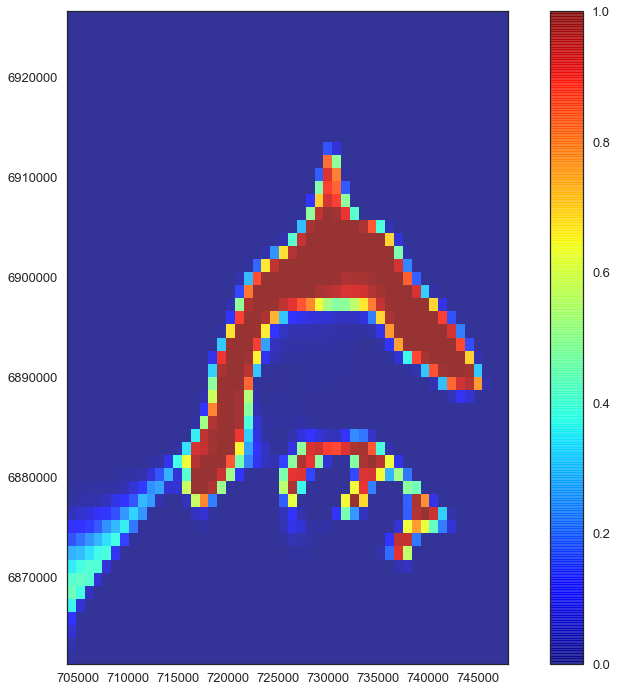

In [310]:
plt.imshow(probability_simpleMafic_post[0, :].reshape((50, 50, 50))[:,:,-1].T,
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='jet', origin='lower', alpha=.8)
plt.colorbar()

plt.show()

## Appendix

In [421]:
geo_model.grid.regular_grid.values.shape

(125000, 3)

In [411]:
sol.scalar_field_at_surface_points

array([[0.47585693, 0.        , 0.        , 0.        ],
       [0.        , 0.83571074, 0.8311413 , 0.        ],
       [0.        , 0.        , 0.        , 0.56931067]])

In [407]:
geo_model._interpolator.theano_graph.grid_val_T

Coordinates of the grid points to interpolate

In [394]:
geo_model.grid.values.shape

(899400, 3)

In [402]:
geo_model.get_active_grids()

array(['regular', 'centered'], dtype='<U10')

In [424]:
geo_model.grid.centered_grid.values.shape

(774400, 3)

In [426]:
def closest_node(node, nodes):
    closest_index = distance.cdist([node], nodes).argmin()
    return closest_index


In [373]:
125000/1936

64.56611570247934

In [367]:
tz_rep.shape

(774400,)

In [294]:
density_block_loop_f [int(geo_model._interpolator.theano_graph.lg0.eval()) 
                      : int(geo_model._interpolator.theano_graph.lg1.eval())]


array([], dtype=float64)

In [293]:
float(geo_model._interpolator.theano_graph.lg1.eval())

899400.0

In [340]:
float(geo_model._interpolator.theano_graph.lg0.eval())

125000.0

In [372]:
899400 - 125000

774400

In [242]:
geo_model.grid.centered_grid.kernel_centers.shape

(1936, 3)

In [243]:
theano.shared(np.array(1, dtype='int64'), 'position of the density on the values matrix')

position of the density on the values matrix

In [ ]:
densities = solutions[0][self.pos_density, self.lg0:self.lg1]
solutions[12] = self.compute_forward_gravity_pro(densities)

In [358]:
n_measurements

1936

In [353]:

densities_rep = np.tile(density_block_loop_f, n_measurements)
densities_selected = densities_rep#[T.nonzero(T.cast(select, "int8"))[0]]
densities_selected_reshaped = densities_selected.reshape((n_measurements, -1))
#
# # density times the component z of gravity
grav = densities_selected_reshaped * tz.reshape((1936,1))

In [361]:
grav.sum(axis=1).shape

(1936,)

## Appendix

In [ ]:
gp.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})

In [ ]:
geo_model.add_surface_values([0, 2.6, 2.4, 3.2, 3.6], ['density'])

In [ ]:
import theano.tensor as T
def compute_forward_gravity(self): # densities, tz, select,

    # TODO: Assert outside that densities is the same size as surfaces (minus df)
    # Compute the geological model
    lith_matrix, fault_matrix, pfai = self.compute_geological_model()

    # if n_faults == 0:
    #     surfaces = T.concatenate([self.n_surface[::-1], T.stack([0])])
    # else:
    #     surfaces = T.concatenate([self.n_surface[:n_faults-1:-1], T.stack([0])])
    #
    #     if False:
    #         surfaces = theano.printing.Print('surfaces')(surfaces)
    #
    # # Substitue lithologies by its density
    # density_block_loop, updates4 = theano.scan(self.switch_densities,
    #                             outputs_info=[lith_matrix[0]],
    #                              sequences=[surfaces, self.densities],
    #                             return_list = True
    # )

    # if False:
    #     density_block_loop_f = T.set_subtensor(density_block_loop[-1][-1][self.weigths_index], self.weigths_weigths)
    #
    # else:
    density_block_loop_f = lith_matrix[0]


    if 'density_block' in self.verbose:
        density_block_loop_f = theano.printing.Print('density block')(density_block_loop_f)

    n_measurements = self.tz.shape[0]
    # Tiling the density block for each measurent and picking just the closer to them. This has to be possible to
    # optimize

    #densities_rep = T.tile(density_block_loop[-1][-1], n_measurements)
    densities_rep = T.tile(density_block_loop_f, n_measurements)
    densities_selected = densities_rep[T.nonzero(T.cast(self.select, "int8"))[0]]
    densities_selected_reshaped = densities_selected.reshape((n_measurements, -1))
    #
    # # density times the component z of gravity
    grav = densities_selected_reshaped * self.tz

    #return [lith_matrix, self.fault_matrix, pfai, grav.sum(axis=1)]
    return [lith_matrix, fault_matrix, grav.sum(axis=1), pfai]

In [ ]:
geo_model.set_centered_grid(xy_ravel, resolution=[10, 10, 15], radius=5000)
geo_model.grid.centered_grid.kernel_centers
g = GravityPreprocessing(geo_model.grid.centered_grid)
tz = g.set_tz_kernel()